# BANK CUSTOMERS CHURN

Ngân hàng Đa quốc gia này đang đối mặt với thách thức mất khách hàng (Customer Churn). Việc khách hàng rời bỏ không chỉ ảnh hưởng trực tiếp đến doanh thu mà còn làm tăng chi phí hoạt động, bởi vì chi phí để thu hút một khách hàng mới thường cao hơn đáng kể so với chi phí để giữ chân một khách hàng hiện tại.

## BUSINESS UNDERSTANDING

Mục tiêu kinh doanh cốt lõi là giảm tỷ lệ khách hàng rời bỏ bằng cách:
- Hiểu rõ các yếu tố thúc đẩy khách hàng quyết định ngừng sử dụng dịch vụ của ngân hàng.
- Dự đoán những khách hàng nào có nguy cơ cao sẽ rời bỏ trong tương lai gần.
- Sử dụng những hiểu biết và dự đoán này để xây dựng các chiến lược giữ chân hiệu quả, như các chương trình khách hàng thân thiết được cá nhân hóa, cải thiện chất lượng dịch vụ, hoặc các chiến dịch tiếp cận chủ động.

## DATA PREPARATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Customer-Churn-Records.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Không có giá trị thiếu (Non-Null Count): Tất cả các cột đều có 10000 giá trị không thiếu, bằng với tổng số hàng (10000 entries), không cần xử lí giá trị null

In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
df.describe(include = 'object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [ ]:
# Kiểm tra các giá trị duy nhất trong các cột phân loại để hiểu rõ hơn về các hạng mục
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Card Type: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [ ]:
# Define Features (X) and Target (y): Tách DataFrame thành X và y
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
# kiểm tra xem dữ liệu có bị trùng không
df.duplicated().sum()

np.int64(0)

In [ ]:
# Loại bỏ các cột không cần thiết/không liên quan:
# RowNumber: Chỉ là số thứ tự hàng, không có giá trị dự đoán. => Loại bỏ.
# CustomerId: Mã định danh duy nhất cho mỗi khách hàng, không có giá trị dự đoán nội tại. => Loại bỏ.
# Surname: Họ của khách hàng, được cho là không ảnh hưởng và có quá nhiều giá trị duy nhất (high cardinality), khó sử dụng cho mô hình. => Loại bỏ.
# ===> Drop Columns: RowNumber, Surname.
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## DATA ANALYSIS

#### Xác định các yếu tố dự báo Churn mạnh nhất:

In [ ]:
'''
Xác định các yếu tố dự báo Churn mạnh nhất:
Trong số các biến như CreditScore, Age, Tenure, Balance, NumOfProducts, IsActiveMember, EstimatedSalary, yếu tố nào có tác động mạnh nhất đến việc khách hàng rời bỏ (Exited)?
'''
features_to_analyze = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'

# Tạo một DataFrame con chỉ chứa các cột này để phân tích tập trung
df_subset = df[features_to_analyze + [target]].copy()

In [ ]:
# Phân tích Tương quan\
correlation_matrix = df_subset.corr()
corr_with_exited = correlation_matrix[target].drop(target).sort_values(ascending=False) # Bỏ chính nó và sắp xếp
corr_with_exited

,Exited
Age,0.285296
Balance,0.118577
EstimatedSalary,0.012490
Tenure,-0.013656
CreditScore,-0.026771
NumOfProducts,-0.047611
IsActiveMember,-0.156356


<ipython-input-40-8aa4d3436ae8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_exited.values, y=corr_with_exited.index, palette='coolwarm')


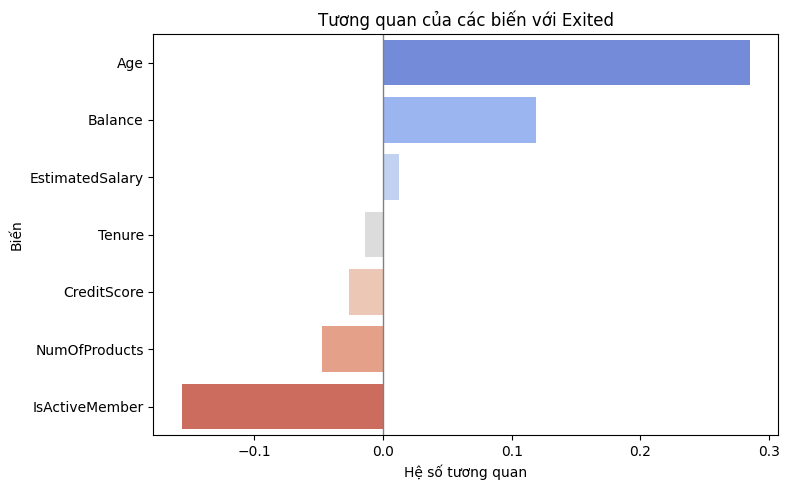

In [ ]:
# Trực quan hóa tương quan với Exited
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_exited.values, y=corr_with_exited.index, palette='coolwarm')
plt.title('Tương quan của các biến với Exited')
plt.xlabel('Hệ số tương quan')
plt.ylabel('Biến')
plt.axvline(x=0, color='grey', lw=1) # Đường tham chiếu tại 0
plt.tight_layout()
plt.show()

In [ ]:
# Import necessary class
from sklearn.linear_model import LogisticRegression

# Hệ số hồi quy Logistic (trên dữ liệu đã chuẩn hóa)
X = df_subset[features_to_analyze]
y = df_subset[target]

# Chuẩn hóa dữ liệu features (QUAN TRỌNG để so sánh hệ số)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Huấn luyện mô hình Logistic Regression đơn giản
log_reg = LogisticRegression(random_state=42, solver='liblinear') # solver='liblinear' tốt cho dataset nhỏ
log_reg.fit(X_scaled, y)

# Lấy hệ số
coefficients = log_reg.coef_[0]

# Tạo DataFrame để xem kết quả
coeff_df = pd.DataFrame({'Feature': features_to_analyze, 'Coefficient': coefficients})
# Sắp xếp theo giá trị tuyệt đối của hệ số để xem tầm quan trọng
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

coeff_df

,Feature,Coefficient
1,Age,0.763154
5,IsActiveMember,-0.541806
3,Balance,0.308804
0,CreditScore,-0.059077
2,Tenure,-0.046354
6,EstimatedSalary,0.031692
4,NumOfProducts,-0.012890


#### Phân tích ảnh hưởng của đặc điểm nhân khẩu học

###### Phân tích theo địa lí

In [ ]:
# Tính tỷ lệ churn trung bình cho mỗi quốc gia
churn_rate_geo = df.groupby('Geography')['Exited'].mean().sort_values(ascending=False) * 100
print("Tỷ lệ Churn (%) theo từng Quốc gia:")
print(churn_rate_geo)

Tỷ lệ Churn (%) theo từng Quốc gia:
Geography
Germany    32.443204
Spain      16.673395
France     16.174711
Name: Exited, dtype: float64


<ipython-input-42-face8114586a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_geo = sns.barplot(x=churn_rate_geo.index, y=churn_rate_geo.values, palette='viridis')


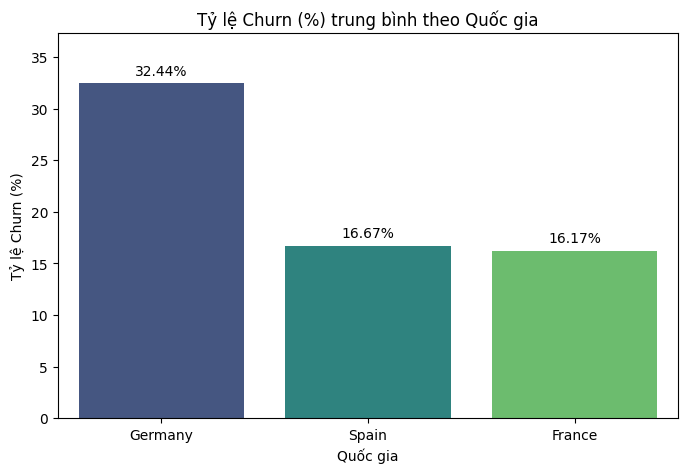

In [ ]:
# Trực quan hóa tỷ lệ churn theo địa lý
plt.figure(figsize=(8, 5))
ax_geo = sns.barplot(x=churn_rate_geo.index, y=churn_rate_geo.values, palette='viridis')
plt.title('Tỷ lệ Churn (%) trung bình theo Quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('Tỷ lệ Churn (%)')
plt.ylim(0, churn_rate_geo.max() * 1.15) # Đặt giới hạn trục y để có không gian cho nhãn

# Thêm nhãn phần trăm
for p in ax_geo.patches:
    ax_geo.annotate(f'{p.get_height():.2f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.show()

###### Phân tích theo giới tính

In [ ]:
# Tính tỷ lệ churn trung bình cho mỗi giới tính
churn_rate_gender = df.groupby('Gender')['Exited'].mean().sort_values(ascending=False) * 100
print("Tỷ lệ Churn (%) theo từng Giới tính:")
print(churn_rate_gender)

Tỷ lệ Churn (%) theo từng Giới tính:
Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


<ipython-input-44-ce78e09b1724>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_gender = sns.barplot(x=churn_rate_gender.index, y=churn_rate_gender.values, palette='pastel')


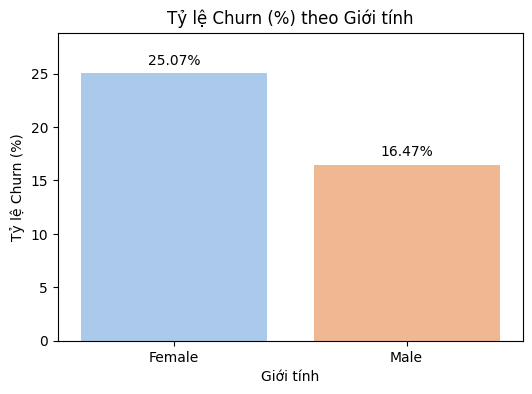

In [ ]:
# Trực quan hóa
plt.figure(figsize=(6, 4))
ax_gender = sns.barplot(x=churn_rate_gender.index, y=churn_rate_gender.values, palette='pastel')
plt.title('Tỷ lệ Churn (%) theo Giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Tỷ lệ Churn (%)')
plt.ylim(0, churn_rate_gender.max() * 1.15)

# Thêm nhãn phần trăm
for p in ax_gender.patches:
    ax_gender.annotate(f'{p.get_height():.2f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.show()

###### Phân tích theo tuổi

In [ ]:
# Tạo các nhóm tuổi để xem xét mối quan hệ rõ ràng hơn
# Xác định các khoảng tuổi (bins) và nhãn (labels)
max_age = df['Age'].max()
bins = [18, 25, 39, 59, 65, max_age] # Điều chỉnh các khoảng nếu cần
labels = ['Young Adults', 'Adults', 'Middle-Aged Adults', 'Older Adults', 'Retired']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False) # right=False: [18, 30)

'''
AgeGroup:
Young Adults: 18-24
Adults: 25-39
Middle-Aged Adults: 40-59
Older Adults: 60-65
Retired: 65+
'''

'\nAgeGroup:\nYoung Adults: 18-24\nAdults: 25-39\nMiddle-Aged Adults: 40-59\nOlder Adults: 60-65\nRetired: 65+\n'

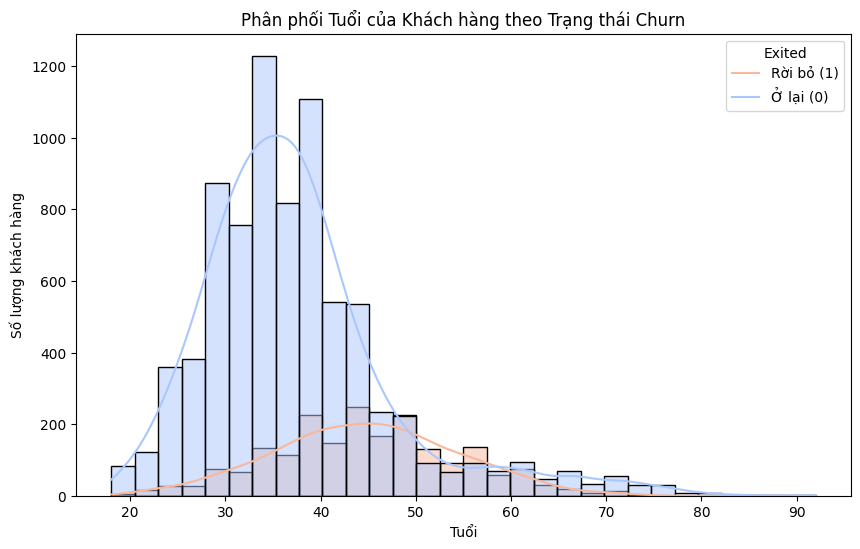

In [ ]:
# Vẽ biểu đồ phân phối tuổi cho nhóm Churn và Không Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, palette='coolwarm', bins=30)
plt.title('Phân phối Tuổi của Khách hàng theo Trạng thái Churn')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Exited', labels=['Rời bỏ (1)', 'Ở lại (0)']) # Điều chỉnh nhãn nếu cần
plt.show()

<ipython-input-47-db2763abd665>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='Age', palette='coolwarm')


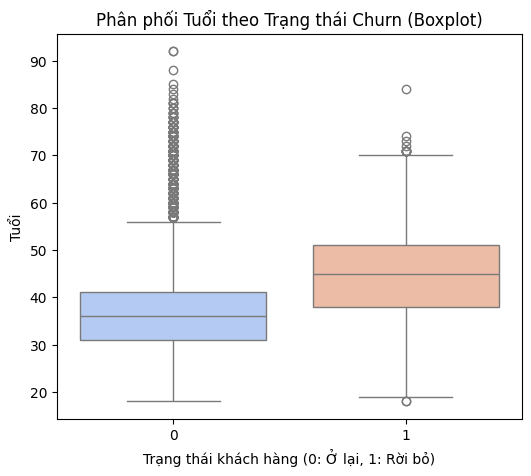

In [ ]:
# Vẽ boxplot để so sánh rõ hơn về trung vị, phân vị
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Exited', y='Age', palette='coolwarm')
plt.title('Phân phối Tuổi theo Trạng thái Churn (Boxplot)')
plt.xlabel('Trạng thái khách hàng (0: Ở lại, 1: Rời bỏ)')
plt.ylabel('Tuổi')
plt.show()

In [ ]:
# Tính tỷ lệ churn cho từng nhóm tuổi
churn_rate_age_group = df.groupby('AgeGroup')['Exited'].mean().sort_index() * 100
print("\nTỷ lệ Churn (%) theo Nhóm Tuổi:")
print(churn_rate_age_group)


Tỷ lệ Churn (%) theo Nhóm Tuổi:
AgeGroup
Young Adults           8.752735
Adults                 9.496769
Middle-Aged Adults    34.719335
Older Adults          43.790850
Retired               15.357143
Name: Exited, dtype: float64


<ipython-input-48-b671f0be66c9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_age_group = df.groupby('AgeGroup')['Exited'].mean().sort_index() * 100


<Axes: xlabel='AgeGroup', ylabel='Exited'>

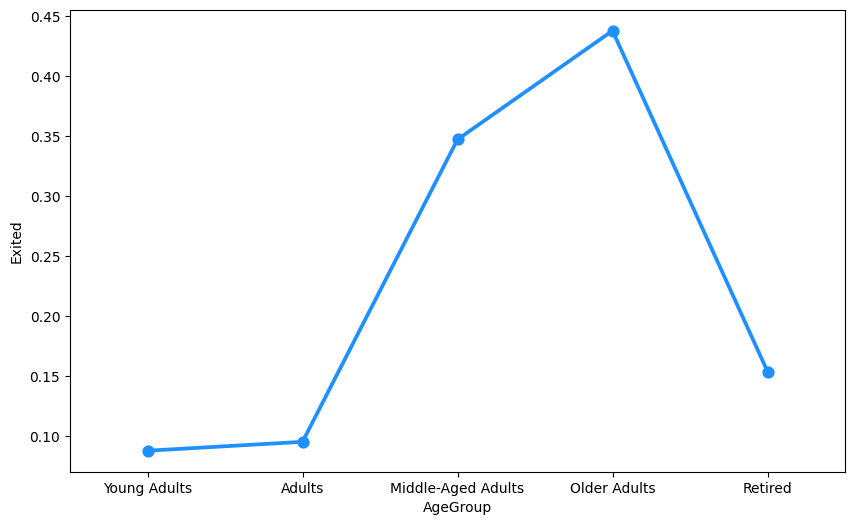

In [ ]:
# Trực quan hóa tỷ lệ churn theo nhóm tuổi
plt.figure(figsize=(10, 6))
sns.pointplot(x='AgeGroup', y='Exited', data=df, errorbar=None, color='dodgerblue', marker='o')

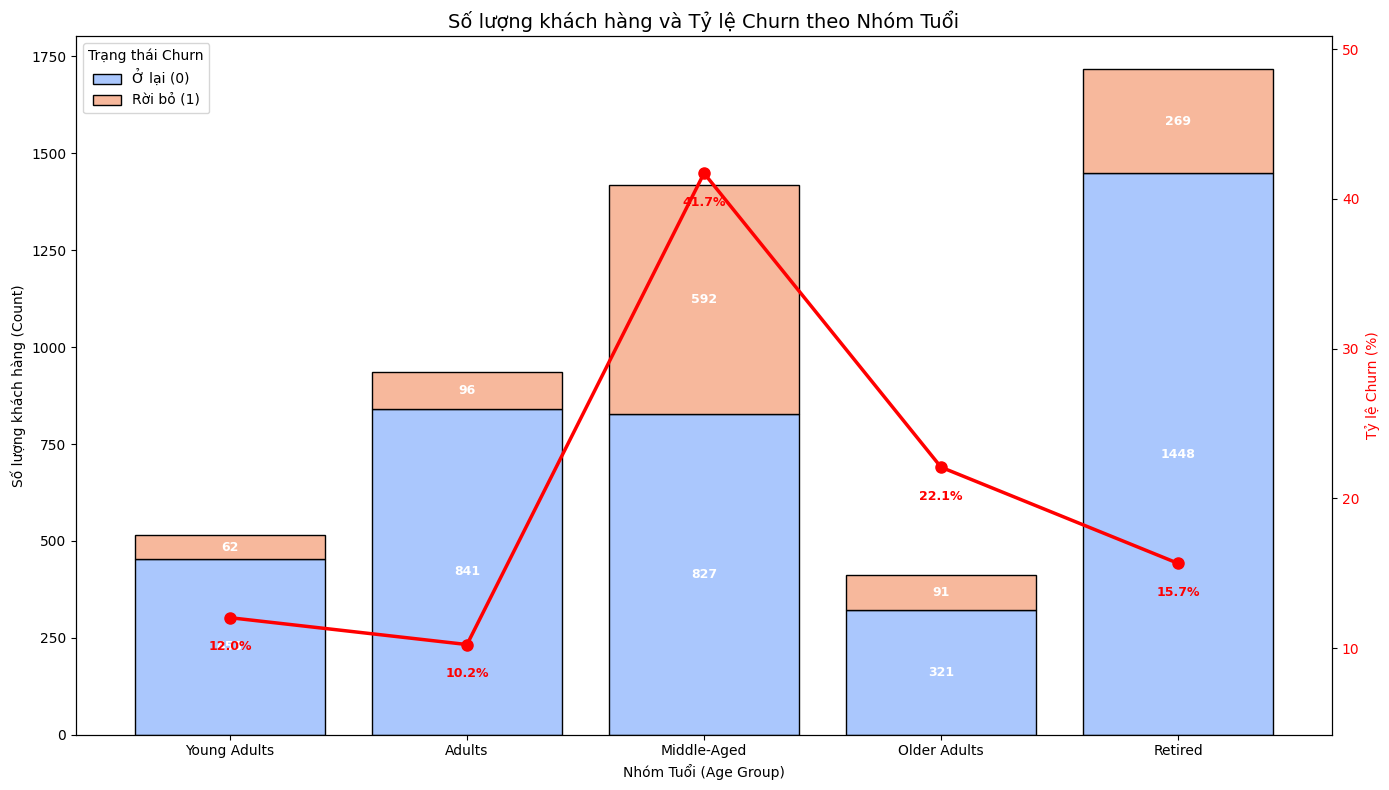


Số lượng khách hàng theo Nhóm Tuổi và Trạng thái Churn:
Exited           0    1
AgeGroup               
Young Adults   453   62
Adults         841   96
Middle-Aged    827  592
Older Adults   321   91
Retired       1448  269

Tỷ lệ Churn (%) theo Nhóm Tuổi:
AgeGroup
Young Adults    12.038835
Adults          10.245464
Middle-Aged     41.719521
Older Adults    22.087379
Retired         15.666861
Name: Exited, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Giả sử bạn đã có DataFrame 'df' với cột 'Age' và 'Exited'
# (Sử dụng lại dữ liệu mẫu)
np.random.seed(0)
data = {'Age': np.random.randint(18, 90, 5000),
        'Exited': np.random.randint(0, 2, 5000)}
df = pd.DataFrame(data)
# Tạo một chút thiên vị churn theo tuổi để biểu đồ có ý nghĩa hơn
df['Exited'] = df.apply(lambda row: 1 if (row['Age'] > 40 and row['Age'] < 60 and np.random.rand() < 0.45) or \
                                       (row['Age'] >= 60 and np.random.rand() < 0.15) or \
                                       (row['Age'] <= 40 and np.random.rand() < 0.1) else 0, axis=1)


# --- 1. Tính toán Nhóm tuổi và Dữ liệu cần thiết ---
max_age = df['Age'].max()
bins = [18, 25, 39, 59, 65, max_age + 1]
labels = ['Young Adults', 'Adults', 'Middle-Aged', 'Older Adults', 'Retired']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Tính số lượng cho từng nhóm tuổi và trạng thái churn
counts = df.groupby(['AgeGroup', 'Exited'], observed=True).size().unstack(fill_value=0)

# Tính tỷ lệ churn (%)
churn_rate_data = df.groupby('AgeGroup', observed=True)['Exited'].mean() * 100 # Đã là %

# --- 2. Vẽ Biểu đồ Kết hợp ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# Biểu đồ 1: Biểu đồ cột chồng
counts.plot(kind='bar', stacked=True, ax=ax1,
            color=sns.color_palette("coolwarm", n_colors=2),
            width=0.8,
            edgecolor='black')

ax1.set_xlabel('Nhóm Tuổi (Age Group)')
ax1.set_ylabel('Số lượng khách hàng (Count)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=0)

# Chú thích cho cột chồng
handles, legend_labels_pd = ax1.get_legend_handles_labels()
ordered_labels = ['Ở lại (0)', 'Rời bỏ (1)']
ax1.legend(handles=handles, labels=ordered_labels, title='Trạng thái Churn', loc='upper left')

# Thêm nhãn giá trị cho cột chồng
cumulative_counts = counts.cumsum(axis=1)
for i, age_group in enumerate(counts.index):
    count_0 = counts.loc[age_group, 0]
    count_1 = counts.loc[age_group, 1]
    if count_0 > 0:
         ax1.text(i, count_0 / 2, f'{count_0}', ha='center', va='center', fontsize=9, color='white', fontweight='bold')
    if count_1 > 0:
         ax1.text(i, count_0 + count_1 / 2, f'{count_1}', ha='center', va='center', fontsize=9, color='white', fontweight='bold')

# Tạo trục Y thứ hai (ax2)
ax2 = ax1.twinx()

# --- Biểu đồ 2: Biểu đồ đường Tỷ lệ Churn (MÀU ĐỎ) ---
x_coords = np.arange(len(churn_rate_data.index))
ax2.plot(x_coords, churn_rate_data.values,
         color='red',
         marker='o', markersize=8, linestyle='-', linewidth=2.5,
         clip_on=False) # Cho phép marker vẽ ra ngoài vùng plot nếu cần

ax2.set_ylabel('Tỷ lệ Churn (%)', color='red') # Đã là %
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)

# Đặt giới hạn trục Y thứ hai - Cần có không gian ở dưới
if not churn_rate_data.empty:
    min_rate = churn_rate_data.min()
    max_rate = churn_rate_data.max()
    # Mở rộng giới hạn dưới để có chỗ cho nhãn
    ax2.set_ylim(min_rate * 0.9 - 5, max_rate * 1.1 + 5) # Trừ 5 ở dưới, cộng 5 ở trên
else:
    ax2.set_ylim(-5, 105) # Đảm bảo không gian dưới 0

# --- Thêm nhãn giá trị cho đường tỷ lệ churn (MÀU ĐỎ) - Đặt xuống dưới ---
for i, rate in enumerate(churn_rate_data.values):
    if pd.notna(rate): # Kiểm tra giá trị hợp lệ
        y_pos_text = rate - 1.5 # <<< ĐẶT VỊ TRÍ Y THẤP HƠN ĐIỂM (điều chỉnh offset 1.5 nếu cần)
        label_text = f'{rate:.1f}%' # <<< ĐỊNH DẠNG % VÀ 1 SỐ LẺ
        ax2.text(i, y_pos_text, label_text,
                 color='red',
                 ha='center',
                 va='top', # <<< CĂN CHỈNH ĐỈNH CHỮ VÀO VỊ TRÍ Y
                 fontsize=9, fontweight='bold')


# --- 3. Hoàn thiện Biểu đồ ---
plt.title('Số lượng khách hàng và Tỷ lệ Churn theo Nhóm Tuổi', fontsize=14)
ax1.set_xticks(x_coords)
ax1.set_xticklabels(churn_rate_data.index)

fig.tight_layout()
plt.show()

# In lại tỷ lệ churn (tùy chọn)
print("\nSố lượng khách hàng theo Nhóm Tuổi và Trạng thái Churn:")
print(counts)
print("\nTỷ lệ Churn (%) theo Nhóm Tuổi:")
print(churn_rate_data)

#### Đánh giá tác động của các yếu tố tài chính và sản phẩm

###### Phân tích Phân tích CreditScore

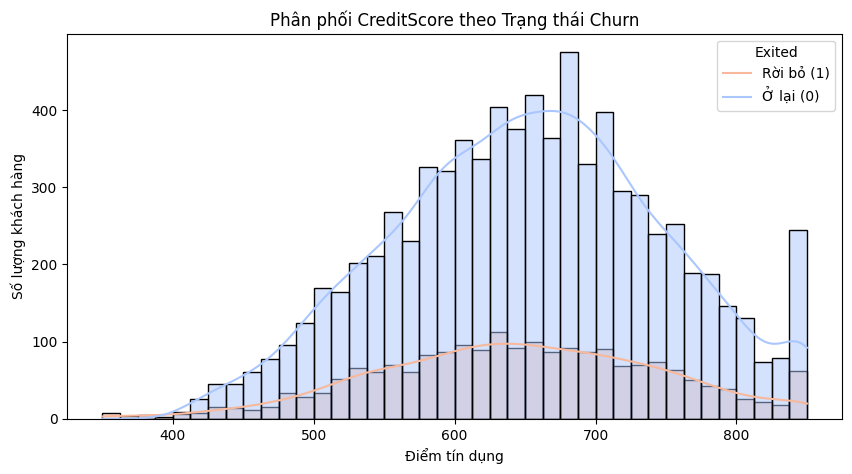

In [ ]:
# Xem phân phối CreditScore theo Exited
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True, palette='coolwarm', bins=40)
plt.title('Phân phối CreditScore theo Trạng thái Churn')
plt.xlabel('Điểm tín dụng')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Exited', labels=['Rời bỏ (1)', 'Ở lại (0)'])
plt.show()

<ipython-input-51-028d82eea81c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='CreditScore', palette='coolwarm')


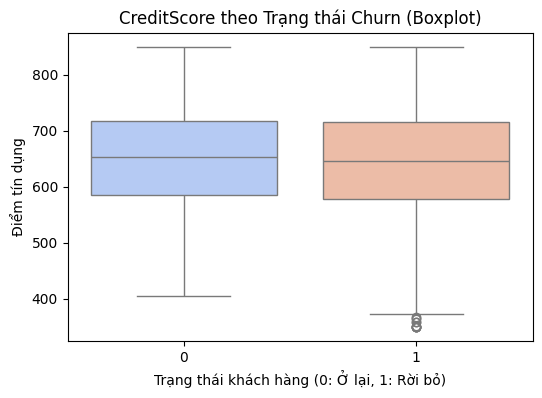

In [ ]:
# Xem mối quan hệ qua Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Exited', y='CreditScore', palette='coolwarm')
plt.title('CreditScore theo Trạng thái Churn (Boxplot)')
plt.xlabel('Trạng thái khách hàng (0: Ở lại, 1: Rời bỏ)')
plt.ylabel('Điểm tín dụng')
plt.show()

<ipython-input-52-36aa85a34f92>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_credit_group = df.groupby('CreditScoreGroup')['Exited'].mean().sort_index() * 100


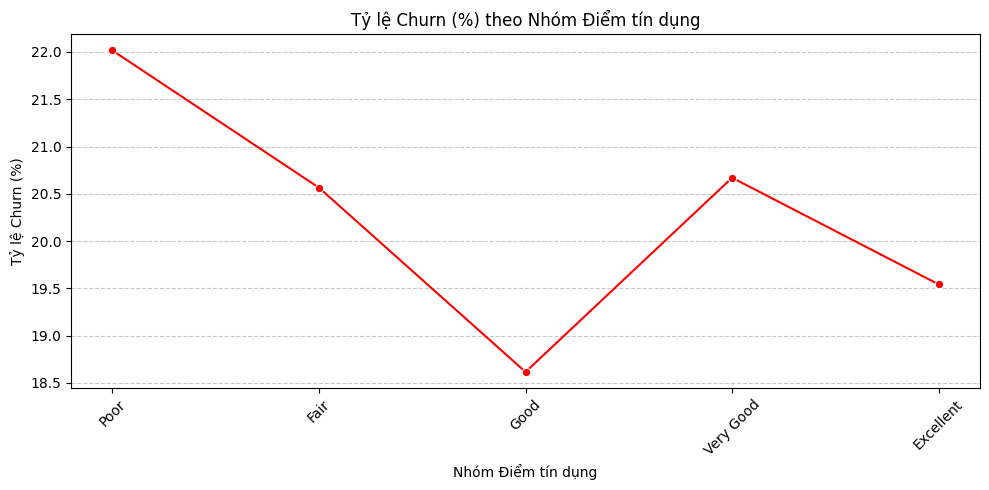

In [ ]:
# Kiểm tra tỷ lệ churn theo nhóm CreditScore để khách hàng sẽ rời bỏ trong tương lai gần
# Chia CreditScore thành các nhóm nhỏ
score_bins = [300, 580, 670, 740, 800, 1000] # Có thể điều chỉnh các khoảng này
score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=score_bins, labels=score_labels, right=False)
'''
CreditScoreGroup:
Poor: 300-580
Fair: 580-670
Good: 670-740
Very Good: 740-800
Excellent: 800-1000
'''

churn_rate_credit_group = df.groupby('CreditScoreGroup')['Exited'].mean().sort_index() * 100

plt.figure(figsize=(10, 5))
sns.lineplot(x=churn_rate_credit_group.index, y=churn_rate_credit_group.values, marker='o', color='red')
plt.title('Tỷ lệ Churn (%) theo Nhóm Điểm tín dụng')
plt.xlabel('Nhóm Điểm tín dụng')
plt.ylabel('Tỷ lệ Churn (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

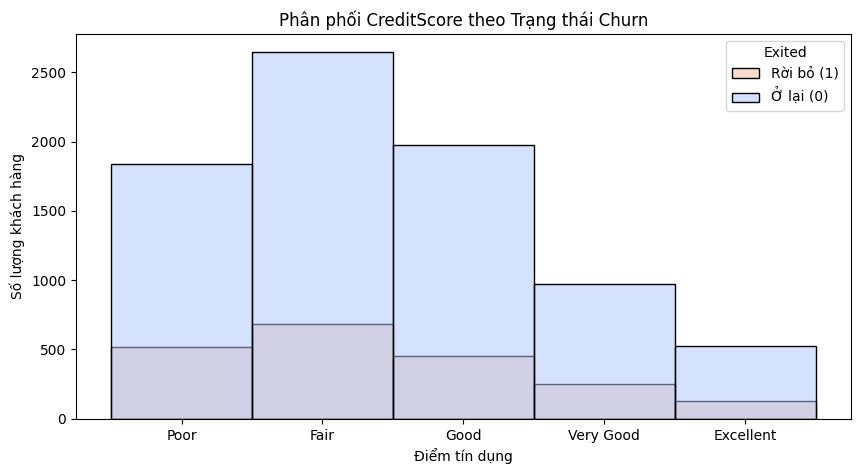

In [ ]:
# Xem phân phối CreditScore theo Exited
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='CreditScoreGroup', hue='Exited', palette='coolwarm', bins=40)
plt.title('Phân phối CreditScore theo Trạng thái Churn')
plt.xlabel('Điểm tín dụng')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Exited', labels=['Rời bỏ (1)', 'Ở lại (0)'])
plt.show()

In [ ]:
# tìm điểm chung giữaa các khách hàng sở hữu điểm very good và excellent có khả năng rời bỏ trong tương lai
df[(df['CreditScore'] >= 740) & (df['CreditScore'] <= 1000)].Exited.value_counts()

,count
Exited,
0,1187
1,313


###### Phân tích Số dư (Balance)

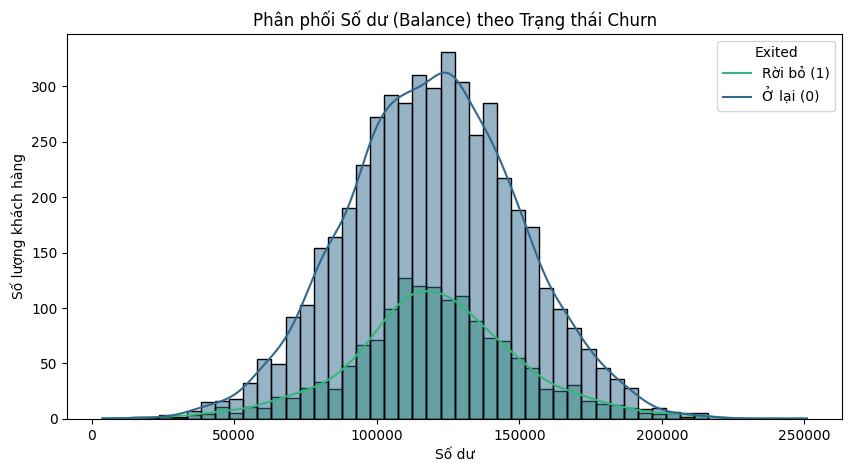

In [ ]:
# Xem phân phối Balance theo Exited
df_copy = df[df['Balance'] > 0].copy() # Tạo bản sao để tránh thay đổi dữ liệu gốc
plt.figure(figsize=(10, 5))
sns.histplot(data=df_copy, x='Balance', hue='Exited', kde=True, palette='viridis', bins=50)
plt.title('Phân phối Số dư (Balance) theo Trạng thái Churn')
plt.xlabel('Số dư')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Exited', labels=['Rời bỏ (1)', 'Ở lại (0)'])
plt.show()

In [ ]:
df_copy

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,CreditScoreGroup
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Middle-Aged Adults,Fair
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Middle-Aged Adults,Poor
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Middle-Aged Adults,Excellent
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,Middle-Aged Adults,Fair
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282,Adults,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369,Middle-Aged Adults,Fair
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715,Adults,Fair
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,Adults,Poor
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,Middle-Aged Adults,Very Good


In [ ]:
df['Balance'].value_counts()

,count
Balance,
0.00,3617
130170.82,2
105473.74,2
159397.75,1
144238.70,1
...,...
108698.96,1
238387.56,1
111833.47,1


In [ ]:
df_copy = df[df['Balance'] > 0].copy() # Tạo bản sao để tránh thay đổi dữ liệu gốc
df_copy['Balance_grp'] = None

bin_rat_it = df_copy['Balance'].quantile(0.2)
bin_it = df_copy['Balance'].quantile(0.4)
bin_trung_binh = df_copy['Balance'].quantile(0.6)
bin_cao = df_copy['Balance'].quantile(0.8)
bin_rat_cao = df_copy['Balance'].quantile(1)

df_copy.loc[df_copy['Balance'] <= bin_rat_it, "Balance_grp"] = "rat_it"
df_copy.loc[(df_copy['Balance'] > bin_rat_it) & (df_copy['Balance'] <= bin_it), "Balance_grp"] = "it"
df_copy.loc[(df_copy['Balance'] > bin_it) & (df_copy['Balance'] <= bin_trung_binh), "Balance_grp"] = "trung_binh"
df_copy.loc[(df_copy['Balance'] > bin_trung_binh) & (df_copy['Balance'] <= bin_cao), "Balance_grp"] = "cao"
df_copy.loc[(df_copy['Balance'] > bin_cao) & (df_copy['Balance'] <= bin_rat_cao), "Balance_grp"] = "rat cao"

df_copy

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,CreditScoreGroup,Balance_grp
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Middle-Aged Adults,Fair,rat_it
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Middle-Aged Adults,Poor,rat cao
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Middle-Aged Adults,Excellent,trung_binh
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,Middle-Aged Adults,Fair,trung_binh
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282,Adults,Poor,trung_binh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369,Middle-Aged Adults,Fair,rat_it
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715,Adults,Fair,rat cao
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,Adults,Poor,rat_it
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,Middle-Aged Adults,Very Good,rat_it


In [ ]:
bin_rat_it, bin_it, bin_trung_binh, bin_cao, bin_rat_cao

(np.float64(95677.08799999999),
 np.float64(112288.516),
 np.float64(127148.17199999999),
 np.float64(144570.576),
 np.float64(250898.09))

In [ ]:
df_copy

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,CreditScoreGroup,Balance_grp
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Middle-Aged Adults,Fair,rat_it
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Middle-Aged Adults,Poor,rat cao
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Middle-Aged Adults,Excellent,trung_binh
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,Middle-Aged Adults,Fair,trung_binh
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282,Adults,Poor,trung_binh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369,Middle-Aged Adults,Fair,rat_it
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715,Adults,Fair,rat cao
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,Adults,Poor,rat_it
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,Middle-Aged Adults,Very Good,rat_it


In [ ]:
df_copy.Balance_grp.value_counts()

,count
Balance_grp,
rat_it,1277
rat cao,1277
trung_binh,1277
cao,1276
it,1276


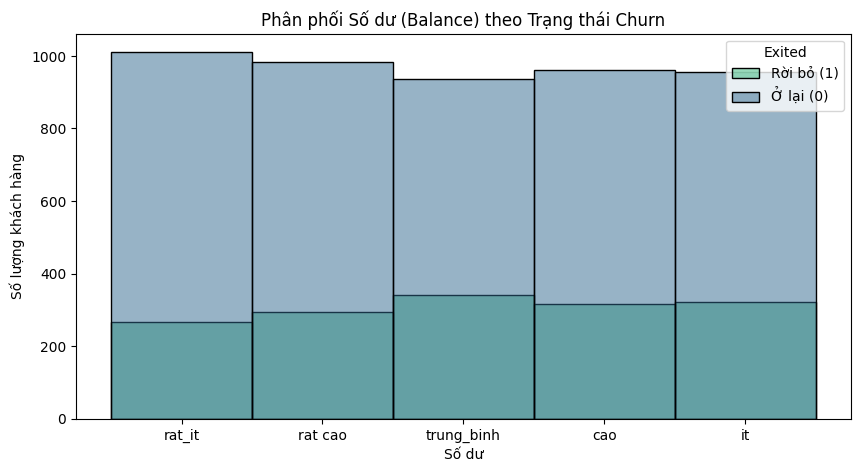

In [ ]:
# Xem phân phối Balance theo Exited
plt.figure(figsize=(10, 5))
sns.histplot(data=df_copy, x='Balance_grp', hue='Exited', palette='viridis', bins=50)
plt.title('Phân phối Số dư (Balance) theo Trạng thái Churn')
plt.xlabel('Số dư')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Exited', labels=['Rời bỏ (1)', 'Ở lại (0)'])
plt.show()

Balance_grp
cao           24.764890
it            25.156740
rat cao       22.944401
rat_it        20.830070
trung_binh    26.781519
Name: Exited, dtype: float64


<ipython-input-28-f80ffc9ea265>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax_hb = sns.lineplot(x=chart.index, y=chart.values, palette='magma') # Use 'chart' for sorted values


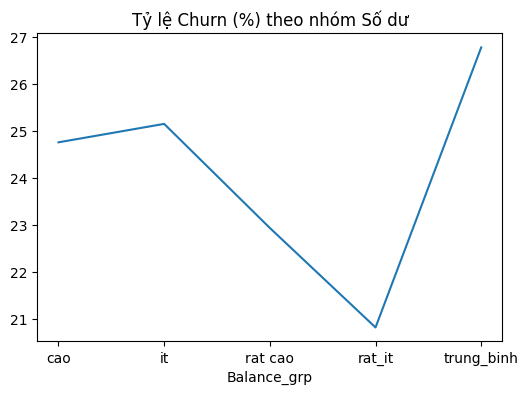

In [ ]:
# vẽ biểu đồ tỉ lệ ròi bỏ dựa trên Balance group
churn_rate_balance_grp = df_copy.groupby('Balance_grp')['Exited'].mean() * 100
print(churn_rate_balance_grp)

# Thay thế 'sort' bằng 'sort_values' và sửa 'true' thành True
chart = churn_rate_balance_grp

plt.figure(figsize=(6, 4))
ax_hb = sns.lineplot(x=chart.index, y=chart.values, palette='magma') # Use 'chart' for sorted values
plt.title('Tỷ lệ Churn (%) theo nhóm Số dư')

for p in ax_hb.patches:
    ax_hb.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

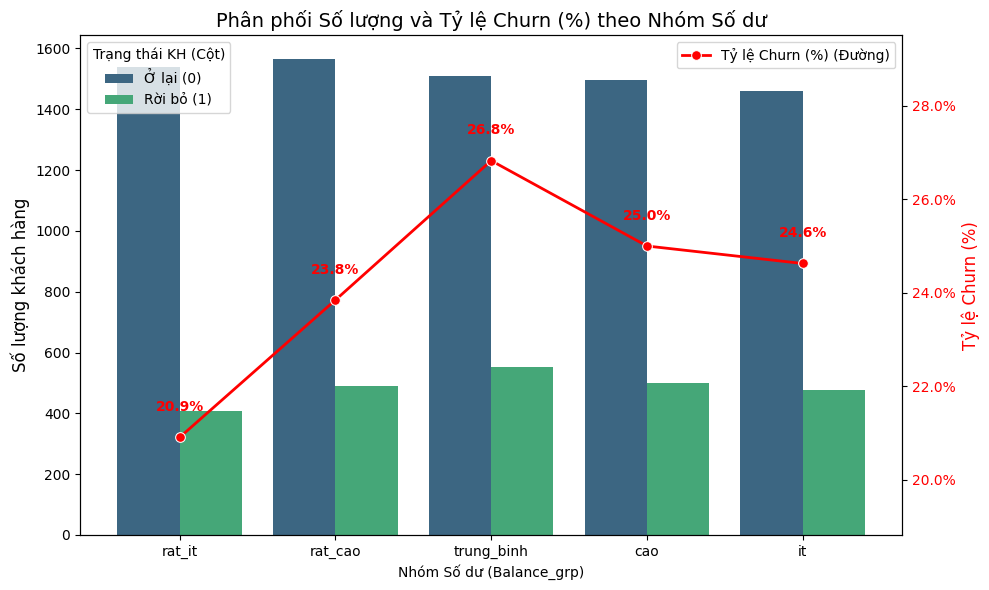

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import matplotlib.ticker as mtick # Import để định dạng trục y %

# --- Giả sử bạn đã có DataFrame 'df_copy' ---
# Ví dụ tạo dữ liệu mẫu (thay thế bằng dữ liệu thật của bạn)
categories = ['rat_it', 'rat_cao', 'trung_binh', 'cao', 'it']
data = {
    'Balance_grp': [random.choice(categories) for _ in range(10000)], # 10000 mẫu
    'Exited': []
}
rates = {'rat_it': 0.208, 'rat_cao': 0.251, 'trung_binh': 0.268, 'cao': 0.247, 'it': 0.251}
for cat in data['Balance_grp']:
  if random.random() < rates[cat]:
    data['Exited'].append(1)
  else:
    data['Exited'].append(0)
df_copy = pd.DataFrame(data)
#----------------------------------------------------

# 1. Tính toán tỷ lệ churn theo nhóm Balance_grp
churn_rate_balance_grp = df_copy.groupby('Balance_grp')['Exited'].mean() * 100

# 2. Định nghĩa thứ tự mong muốn cho các nhóm trên trục X
# Điều chỉnh thứ tự này nếu bạn muốn khác
category_order = ['rat_it', 'rat_cao', 'trung_binh', 'cao', 'it']

# Sắp xếp lại churn_rate_balance_grp theo category_order để vẽ đường line đúng thứ tự
# Sử dụng reindex để xử lý nếu có nhóm nào thiếu dữ liệu (điền NaN)
churn_rate_balance_grp = churn_rate_balance_grp.reindex(category_order)

# 3. Vẽ biểu đồ kết hợp
fig, ax1 = plt.subplots(figsize=(10, 6)) # Tăng kích thước để dễ nhìn hơn

# 4. Vẽ biểu đồ cột (COUNTPLOT - Số lượng) trên ax1
sns.countplot(data=df_copy, x='Balance_grp', hue='Exited',
              palette='viridis', # Palette màu cho cột
              ax=ax1,
              order=category_order) # Đảm bảo thứ tự cột

ax1.set_title('Phân phối Số lượng và Tỷ lệ Churn (%) theo Nhóm Số dư', fontsize=14)
ax1.set_xlabel('Nhóm Số dư (Balance_grp)')
ax1.set_ylabel('Số lượng khách hàng', color='black', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
# Xóa legend mặc định của countplot để tạo legend tổng hợp sau
# ax1.get_legend().remove() # Bỏ dòng này nếu muốn giữ legend gốc của cột

# Cập nhật legend gốc của countplot cho rõ ràng hơn
handles_ax1, labels_ax1 = ax1.get_legend_handles_labels()
label_map = {'0': 'Ở lại (0)', '1': 'Rời bỏ (1)'}
ax1.legend(handles_ax1, [label_map.get(str(lbl), str(lbl)) for lbl in labels_ax1],
           title='Trạng thái KH (Cột)', loc='upper left')


# 5. Tạo trục y thứ cấp ax2
ax2 = ax1.twinx()

# 6. Vẽ biểu đồ đường (LINEPLOT - Tỷ lệ Churn) trên ax2
line = sns.lineplot(x=churn_rate_balance_grp.index,
                    y=churn_rate_balance_grp.values,
                    ax=ax2,
                    color='red',
                    marker='o',
                    markersize=7, # Tăng kích thước marker
                    linewidth=2,  # Tăng độ dày đường
                    sort=False,
                    label='Tỷ lệ Churn (%) (Đường)') # Label cho legend tổng hợp

ax2.set_ylabel('Tỷ lệ Churn (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Định dạng trục y thứ cấp để hiển thị dạng phần trăm
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# Điều chỉnh giới hạn trục y thứ cấp để không quá sát các điểm dữ liệu
min_rate = churn_rate_balance_grp.min()
max_rate = churn_rate_balance_grp.max()
ax2.set_ylim(min_rate * 0.9, max_rate * 1.1) # Ví dụ: 90% min đến 110% max

# 7. Thêm chú thích giá trị tỷ lệ % lên đường line
for i, rate in enumerate(churn_rate_balance_grp.values):
    # Kiểm tra nếu rate không phải NaN trước khi thêm text
    if pd.notna(rate):
        ax2.text(i, rate + 0.5, f'{rate:.1f}%', # Vị trí text hơi cao hơn điểm
                 ha='center', va='bottom', color='red', fontsize=10, fontweight='bold')


# 8. (Tùy chọn) Tạo một legend tổng hợp nếu muốn
# Lấy handles và labels từ cả ax1 và ax2
# handles1, labels1 = ax1.get_legend_handles_labels() # Đã lấy ở trên
# handles2, labels2 = ax2.get_legend_handles_labels() # lineplot tự động tạo label nếu có tham số label=...

# Kết hợp legends (có thể hơi phức tạp nếu có nhiều yếu tố)
# fig.legend(handles=handles_ax1 + [line], # Lấy handles của cột và đường line
#            labels=[label_map.get(str(lbl), str(lbl)) for lbl in labels_ax1] + [line.get_label()],
#            loc='upper right', bbox_to_anchor=(0.9, 0.9))
# ax1.get_legend().remove() # Xóa legend gốc nếu tạo legend tổng hợp


# 9. Điều chỉnh layout và hiển thị
fig.tight_layout()
plt.show()

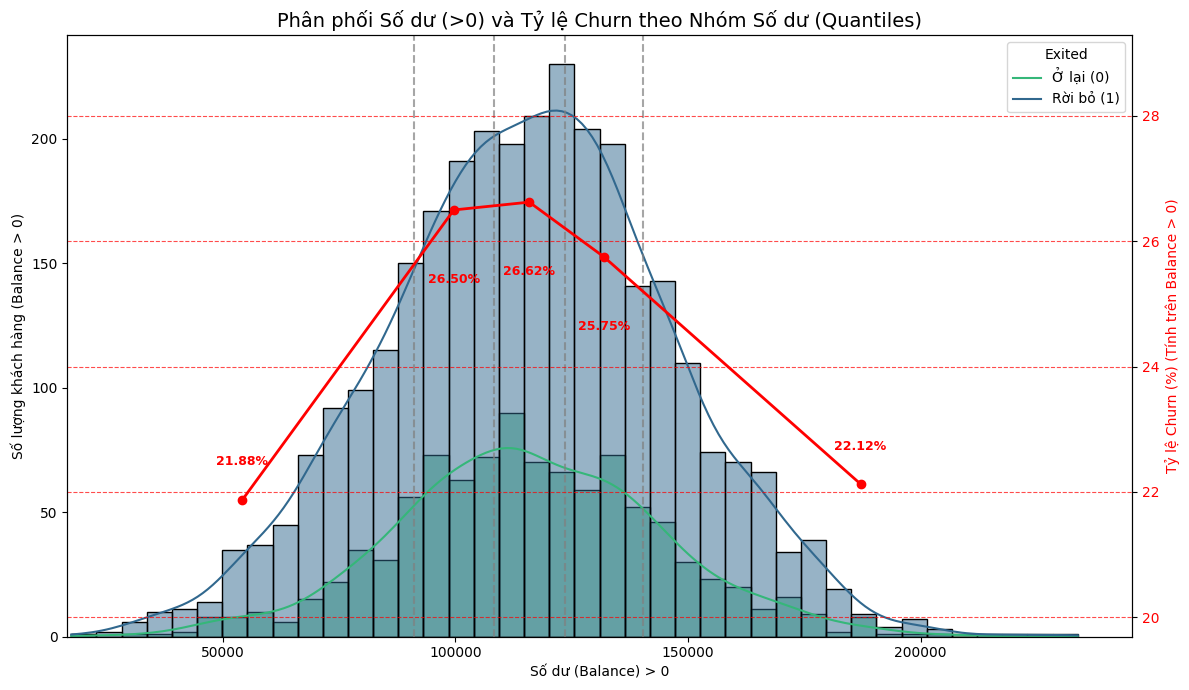


Tỷ lệ Churn (%) theo Nhóm Số dư (Quantile groups, chỉ tính trên Balance > 0):
Balance_grp
Lowest 20%     21.875
Low 20-40%     26.500
Mid 40-60%     26.625
High 60-80%    25.750
Highest 80%    22.125
Name: Exited, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Giả sử bạn đã có DataFrame 'df'
# Ví dụ tạo dữ liệu mẫu (thay thế bằng dữ liệu thực của bạn)
np.random.seed(1)
balance = np.random.normal(loc=115000, scale=30000, size=5000)
balance = np.clip(balance, 0, 250000) # Giới hạn số dư
balance[np.random.choice(5000, 1000, replace=False)] = 0 # Tạo một số người có số dư 0
# Tạo Exited với phụ thuộc vào Balance
def determine_exit_bal(bal):
    if bal == 0: prob = 0.14 # Tỷ lệ churn thấp cho số dư 0
    elif bal < 50000: prob = 0.35
    elif bal < 85000: prob = 0.20
    elif bal < 125000: prob = 0.26
    else: prob = 0.23
    prob += np.random.normal(0, 0.05)
    return 1 if np.random.rand() < prob else 0
exited = [determine_exit_bal(b) for b in balance]
df = pd.DataFrame({'Balance': balance, 'Exited': exited})

# --- 1. Data Preparation (CHỈ SỬ DỤNG Balance > 0) ---
df_copy = df[df['Balance'] > 0].copy() # Tạo bản sao CHỈ chứa Balance > 0

# Kiểm tra xem df_copy có dữ liệu không
if df_copy.empty:
    print("Không có dữ liệu với Balance > 0 để vẽ biểu đồ.")
else:
    # Tính các ngưỡng quantile TRÊN DỮ LIỆU ĐÃ LỌC (df_copy)
    q20 = df_copy['Balance'].quantile(0.2)
    q40 = df_copy['Balance'].quantile(0.4)
    q60 = df_copy['Balance'].quantile(0.6)
    q80 = df_copy['Balance'].quantile(0.8)
    min_bal = df_copy['Balance'].min() # Min balance > 0
    max_bal = df_copy['Balance'].max() # Max balance

    # Định nghĩa các khoảng bin và nhãn (đảm bảo thứ tự logic)
    # Sử dụng giá trị thực tế từ quantile để làm ranh giới
    bin_edges = [min_bal, q20, q40, q60, q80, max_bal + 1]
    # Nhãn tương ứng với 5 nhóm quantile
    bin_labels_5 = ['Lowest 20%', 'Low 20-40%', 'Mid 40-60%', 'High 60-80%', 'Highest 80%']

    # Tạo cột nhóm Balance_grp là Categorical với thứ tự đúng TRÊN df_copy
    df_copy['Balance_grp'] = pd.cut(df_copy['Balance'], bins=bin_edges, labels=bin_labels_5, right=False, include_lowest=True) # include_lowest để bao gồm min_bal
    df_copy['Balance_grp'] = pd.Categorical(df_copy['Balance_grp'], categories=bin_labels_5, ordered=True)

    # Tính tỷ lệ churn cho từng nhóm TRÊN df_copy
    churn_rate_balance_grp = df_copy.groupby('Balance_grp', observed=False)['Exited'].mean() * 100

    # Tính điểm giữa (midpoint) của mỗi khoảng số dư (bin) TRÊN df_copy
    category_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

    # --- 2. Create Combined Plot (SỬ DỤNG df_copy) ---
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # --- >>> Plot 1: Histogram phân phối Balance THEO df_copy <<< ---
    sns.histplot(data=df_copy, x='Balance', hue='Exited', kde=True, palette='viridis', bins=40, ax=ax1)
    ax1.set_xlabel('Số dư (Balance) > 0') # Cập nhật nhãn trục X
    ax1.set_ylabel('Số lượng khách hàng (Balance > 0)', color='black') # Cập nhật nhãn trục Y
    ax1.tick_params(axis='y', labelcolor='black')

    # Chỉnh sửa legend
    handles, labels = ax1.get_legend_handles_labels()
    label_map = {'0': 'Ở lại (0)', '1': 'Rời bỏ (1)'}
    if handles:
         try:
             zero_idx = labels.index('0')
             one_idx = labels.index('1')
             ordered_handles = [handles[zero_idx], handles[one_idx]]
             ordered_labels = [label_map['0'], label_map['1']]
             ax1.legend(ordered_handles, ordered_labels, title='Exited')
         except ValueError:
             ax1.legend(handles, [label_map.get(lbl, lbl) for lbl in labels], title='Exited')
    else:
        ax1.legend(title='Exited', labels=['Ở lại (0)','Rời bỏ (1)'])

    # Thêm đường dọc phân chia các nhóm (dựa trên quantile values của df_copy)
    for bin_edge in bin_edges[1:-1]:
        ax1.axvline(bin_edge, color='grey', linestyle='--', alpha=0.7)

    # Tạo trục Y thứ hai
    ax2 = ax1.twinx()

    # Plot 2: Line plot Tỷ lệ Churn (%) theo Nhóm Balance (dữ liệu từ df_copy)
    line_color = 'red'
    ax2.plot(category_centers, churn_rate_balance_grp.values, marker='o', color=line_color, linestyle='-', linewidth=2)
    ax2.set_ylabel('Tỷ lệ Churn (%) (Tính trên Balance > 0)', color=line_color) # Cập nhật nhãn
    ax2.tick_params(axis='y', labelcolor=line_color)
    ax2.grid(axis='y', linestyle='--', alpha=0.7, color=line_color)

    # Thêm nhãn giá trị tỷ lệ churn
    for i, rate in enumerate(churn_rate_balance_grp.values):
        if pd.notna(rate):
            x_pos = category_centers[i]
            label_text = f'{rate:.2f}%'
            y_offset = 0.5 if rate < churn_rate_balance_grp.max() * 0.95 else -1.0
            va_align = 'bottom' if y_offset > 0 else 'top'
            ax2.text(x_pos, rate + y_offset, label_text,
                     color=line_color, ha='center', va=va_align,
                     fontsize=9, fontweight='bold', zorder=11)

    # Điều chỉnh giới hạn trục Y phụ
    if not churn_rate_balance_grp.empty:
        min_rate = churn_rate_balance_grp.min()
        max_rate = churn_rate_balance_grp.max()
        ax2.set_ylim(min_rate * 0.90, max_rate * 1.10)
    else:
        ax2.set_ylim(0, 100) # Giới hạn mặc định nếu không có dữ liệu

    # --- 3. Final Touches ---
    plt.title('Phân phối Số dư (>0) và Tỷ lệ Churn theo Nhóm Số dư (Quantiles)', fontsize=14) # Cập nhật tiêu đề

    # Đặt giới hạn trục X phù hợp với dữ liệu df_copy
    ax1.set_xlim(left=min_bal * 0.95, right = max_bal * 1.05) # Điều chỉnh padding

    fig.tight_layout() # Adjust layout
    plt.show()

    # In lại tỷ lệ churn (tùy chọn)
    print("\nTỷ lệ Churn (%) theo Nhóm Số dư (Quantile groups, chỉ tính trên Balance > 0):")
    print(churn_rate_balance_grp)

###### Phân tích NumOfProducts

Số lượng sản phẩm khác nhau: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


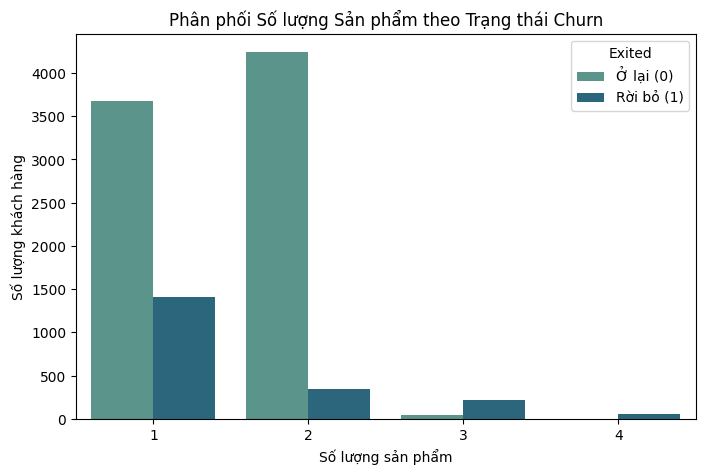

In [ ]:
print("Số lượng sản phẩm khác nhau:", sorted(df['NumOfProducts'].unique()))

# Xem phân phối số lượng sản phẩm theo Exited
plt.figure(figsize=(8, 5))
sns.countplot(x='NumOfProducts', data=df, hue='Exited', palette='crest')
plt.title('Phân phối Số lượng Sản phẩm theo Trạng thái Churn')
plt.xlabel('Số lượng sản phẩm')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Exited', labels=['Ở lại (0)', 'Rời bỏ (1)']) # Đảo nhãn nếu cần khớp màu
plt.show()


Tỷ lệ Churn (%) theo Số lượng Sản phẩm:
NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


<ipython-input-275-02e224320386>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax_np = sns.lineplot(x=churn_rate_num_prod.index, y=churn_rate_num_prod.values, palette='crest_r') # Đảo màu palette


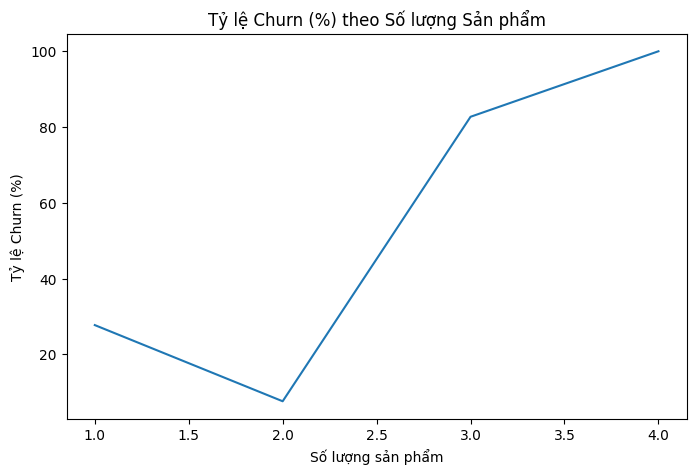

In [ ]:
# Tính tỷ lệ churn cho từng số lượng sản phẩm
churn_rate_num_prod = df.groupby('NumOfProducts')['Exited'].mean() * 100
print("\nTỷ lệ Churn (%) theo Số lượng Sản phẩm:")
print(churn_rate_num_prod)

plt.figure(figsize=(8, 5))
ax_np = sns.lineplot(x=churn_rate_num_prod.index, y=churn_rate_num_prod.values, palette='crest_r') # Đảo màu palette
plt.title('Tỷ lệ Churn (%) theo Số lượng Sản phẩm')
plt.xlabel('Số lượng sản phẩm')
plt.ylabel('Tỷ lệ Churn (%)')
# Thêm nhãn phần trăm
for p in ax_np.patches:
    ax_np.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

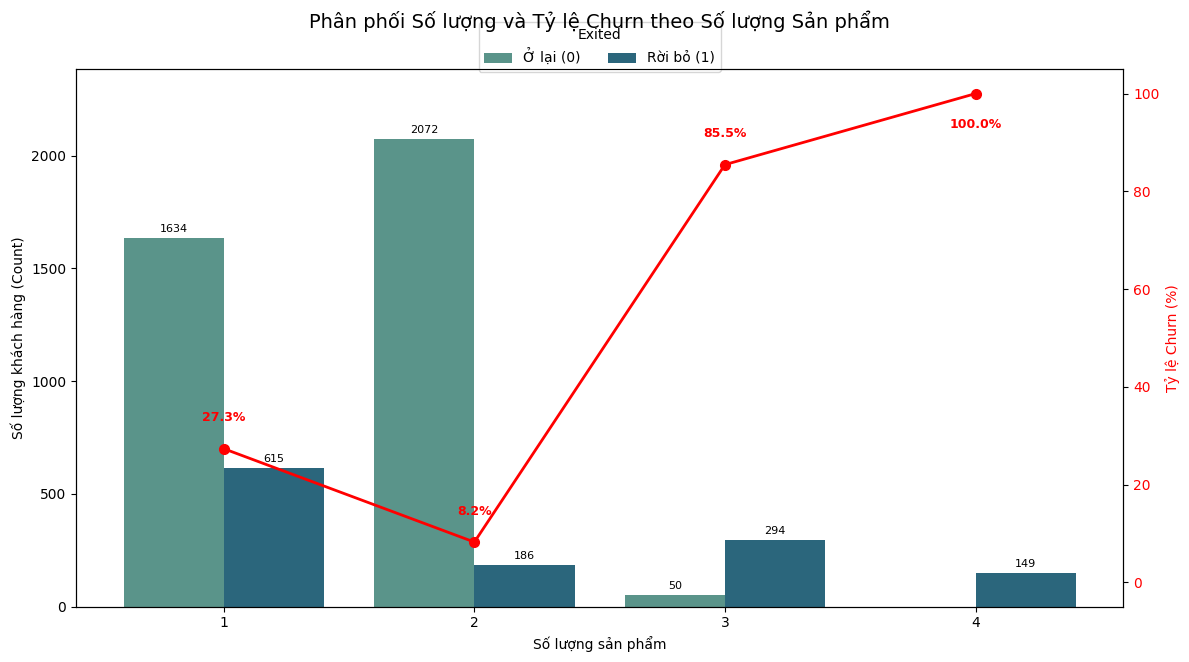


Tỷ lệ Churn (%) theo Số lượng Sản phẩm:
NumOfProducts
1     27.345487
2      8.237378
3     85.465116
4    100.000000
Name: Exited, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Giả sử bạn đã có DataFrame 'df' với cột 'NumOfProducts' và 'Exited'
# (Sử dụng lại dữ liệu mẫu)
np.random.seed(123)
products = np.random.choice([1, 2, 3, 4], 5000, p=[0.45, 0.45, 0.07, 0.03])
def determine_exit(n_prod):
    if n_prod == 1: prob = 0.28
    elif n_prod == 2: prob = 0.08
    elif n_prod == 3: prob = 0.83
    elif n_prod == 4: prob = 1.0
    else: prob = 0.5
    return 1 if np.random.rand() < prob else 0
exited = [determine_exit(p) for p in products]
df = pd.DataFrame({'NumOfProducts': products, 'Exited': exited})


# --- 1. Tính toán Dữ liệu cần thiết ---
churn_rate_num_prod = df.groupby('NumOfProducts')['Exited'].mean().sort_index() * 100


# --- 2. Vẽ Biểu đồ Kết hợp ---
fig, ax1 = plt.subplots(figsize=(12, 7)) # Tăng kích thước một chút

# --- >>> BIỂU ĐỒ 1: SỬ DỤNG BIỂU ĐỒ CỘT NHÓM (GROUPED) <<< ---
# multiple='dodge' là mặc định khi có 'hue' trong countplot
sns.countplot(x='NumOfProducts', data=df, hue='Exited', palette='crest', ax=ax1)

ax1.set_xlabel('Số lượng sản phẩm')
ax1.set_ylabel('Số lượng khách hàng (Count)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=0)

# Chú thích cho countplot (grouped)
handles, legend_labels_pd = ax1.get_legend_handles_labels()
ordered_labels = ['Ở lại (0)', 'Rời bỏ (1)']
ax1.legend(handles=handles, labels=ordered_labels, title='Exited', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2) # Di chuyển legend lên trên

# Thêm nhãn giá trị cho các cột nhóm
for container in ax1.containers:
    labels = [f'{int(v)}' if v > 0 else '' for v in container.datavalues]
    ax1.bar_label(container, labels=labels, label_type='edge', fontsize=8, padding=3)

# Điều chỉnh giới hạn trục Y chính
y_max = 0
# Tìm giá trị max thủ công vì datavalues có thể không cập nhật đúng ngay lập tức với grouped plot
for p in ax1.patches:
    y_max = max(y_max, p.get_height())
ax1.set_ylim(0, y_max * 1.15) # Tăng giới hạn lên 15% để có chỗ cho legend và nhãn


# Tạo trục Y thứ hai (ax2)
ax2 = ax1.twinx()

# --- Biểu đồ 2: Biểu đồ đường Tỷ lệ Churn (%) trên trục Y thứ hai (ax2) ---
line_color = 'red'
# Lấy vị trí tâm của các nhóm trên trục X (ví dụ: 0, 1, 2, 3)
# Hoặc trực tiếp dùng index 1, 2, 3, 4 vì countplot đặt chúng như vậy
x_values = churn_rate_num_prod.index
# Lấy vị trí chính xác của các tick trên trục x mà countplot đã tạo ra
# Điều này quan trọng để căn chỉnh đường kẻ với các nhóm cột
tick_locations = ax1.get_xticks()

ax2.plot(tick_locations, churn_rate_num_prod.values, # Sử dụng tick_locations làm tọa độ x
         color=line_color,
         marker='o', markersize=7, linestyle='-', linewidth=2, zorder=10) # zorder để vẽ đường lên trên cột

ax2.set_ylabel('Tỷ lệ Churn (%)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)
ax2.grid(False)

# Đặt giới hạn trục Y thứ hai
if not churn_rate_num_prod.empty:
     ax2.set_ylim(-5, 105)
else:
     ax2.set_ylim(0, 105)

# Thêm nhãn giá trị cho đường tỷ lệ churn
for i, rate in enumerate(churn_rate_num_prod.values):
    x_pos = tick_locations[i] # Lấy vị trí x tương ứng từ tick_locations
    y_offset = 5 if rate < 95 else -5
    va_align = 'bottom' if rate < 95 else 'top'
    if rate == 0:
        y_offset = 3
        va_align = 'bottom'
    if pd.notna(rate):
        ax2.text(x_pos, rate + y_offset, f'{rate:.1f}%', color=line_color, ha='center', va=va_align, fontsize=9, fontweight='bold', zorder=11)


# --- 3. Hoàn thiện Biểu đồ ---
plt.title('Phân phối Số lượng và Tỷ lệ Churn theo Số lượng Sản phẩm', fontsize=14, pad=30) # Tăng pad cho tiêu đề

# Đảm bảo trục X khớp (countplot thường tự làm tốt)
ax1.set_xticks(ticks=tick_locations)
ax1.set_xticklabels(labels=x_values)


fig.tight_layout(rect=[0, 0, 1, 0.96]) # Điều chỉnh rect để tránh tiêu đề/legend chồng lấn
plt.show()

# In lại tỷ lệ churn (tùy chọn)
print("\nTỷ lệ Churn (%) theo Số lượng Sản phẩm:")
print(churn_rate_num_prod)

###### Phân tích Lương ước tính (EstimatedSalary)

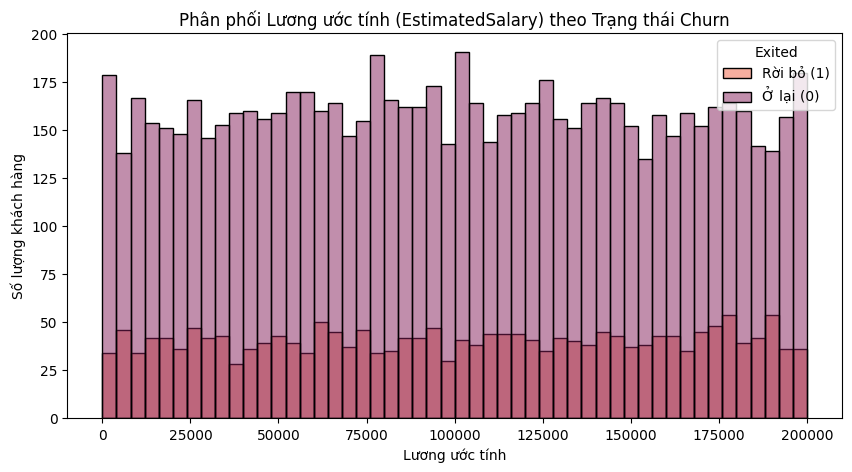

In [ ]:
# Xem phân phối EstimatedSalary theo Exited
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', kde=False, palette='rocket', bins=50)
plt.title('Phân phối Lương ước tính (EstimatedSalary) theo Trạng thái Churn')
plt.xlabel('Lương ước tính')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Exited', labels=['Rời bỏ (1)', 'Ở lại (0)'])
plt.show()

<ipython-input-55-d02737d37955>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='EstimatedSalary', palette='rocket')


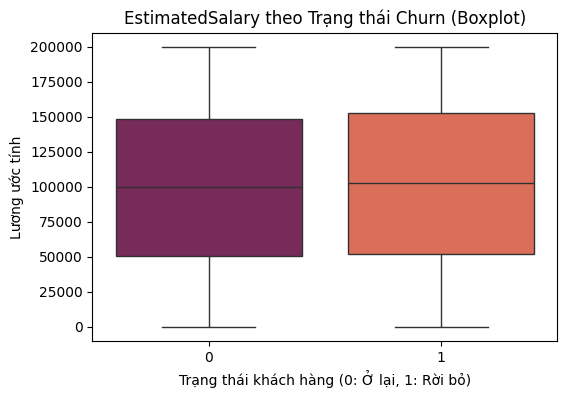

In [ ]:
# Xem mối quan hệ qua Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', palette='rocket')
plt.title('EstimatedSalary theo Trạng thái Churn (Boxplot)')
plt.xlabel('Trạng thái khách hàng (0: Ở lại, 1: Rời bỏ)')
plt.ylabel('Lương ước tính')
plt.show()

In [ ]:
# Kiểm tra tương quan giữa EstimatedSalary và Balance
correlation_salary_balance = df['EstimatedSalary'].corr(df['Balance'])
print(f"\nHệ số tương quan giữa EstimatedSalary và Balance: {correlation_salary_balance:.4f}")


Hệ số tương quan giữa EstimatedSalary và Balance: 0.0128


In [ ]:
# So sánh tương quan với Exited (tính lại nếu chưa có)
corr_with_exited_financial = df[['EstimatedSalary', 'Balance', 'Exited']].corr()['Exited']
print("\nTương quan với Exited:")
print(corr_with_exited_financial.drop('Exited'))


Tương quan với Exited:
EstimatedSalary    0.012490
Balance            0.118577
Name: Exited, dtype: float64


###### Phân tích Việc có thẻ tín dụng (HasCrCard)

Tỷ lệ Churn (%) theo việc Có thẻ tín dụng (1) hay Không (0):
HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64


<ipython-input-58-cdb0dfdad142>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_cc = sns.barplot(x=churn_rate_cc.index, y=churn_rate_cc.values, palette='Blues')


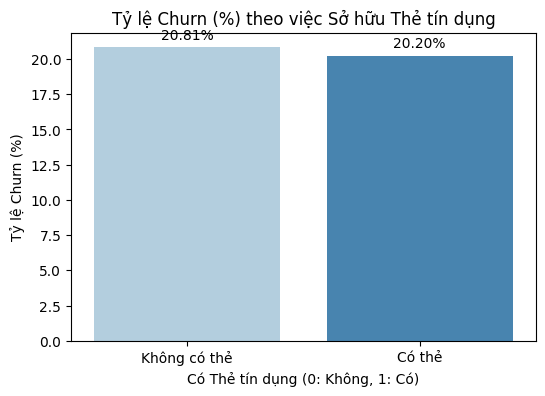

In [ ]:
churn_rate_cc = df.groupby('HasCrCard')['Exited'].mean() * 100
print("Tỷ lệ Churn (%) theo việc Có thẻ tín dụng (1) hay Không (0):")
print(churn_rate_cc)

plt.figure(figsize=(6, 4))
ax_cc = sns.barplot(x=churn_rate_cc.index, y=churn_rate_cc.values, palette='Blues')
plt.title('Tỷ lệ Churn (%) theo việc Sở hữu Thẻ tín dụng')
plt.xlabel('Có Thẻ tín dụng (0: Không, 1: Có)')
plt.ylabel('Tỷ lệ Churn (%)')
plt.xticks([0, 1], ['Không có thẻ', 'Có thẻ'])

# Thêm nhãn phần trăm
for p in ax_cc.patches:
    ax_cc.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

###### Phân tích Loại thẻ (Card Type) & Điểm tích lũy (Point Earned)

Tỷ lệ Churn (%) theo Loại thẻ:
Card Type
DIAMOND     21.779019
PLATINUM    20.360721
SILVER      20.112179
GOLD        19.264588
Name: Exited, dtype: float64


<ipython-input-59-b9e485ba55d8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_card = sns.barplot(x=churn_rate_card.index, y=churn_rate_card.values, palette='plasma')


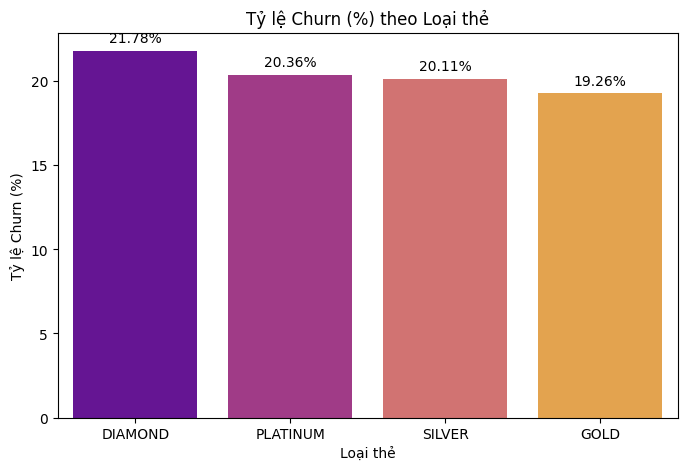

In [ ]:
churn_rate_card = df.groupby('Card Type')['Exited'].mean().sort_values(ascending=False) * 100
print("Tỷ lệ Churn (%) theo Loại thẻ:")
print(churn_rate_card)

plt.figure(figsize=(8, 5))
ax_card = sns.barplot(x=churn_rate_card.index, y=churn_rate_card.values, palette='plasma')
plt.title('Tỷ lệ Churn (%) theo Loại thẻ')
plt.xlabel('Loại thẻ')
plt.ylabel('Tỷ lệ Churn (%)')
# Thêm nhãn phần trăm
for p in ax_card.patches:
    ax_card.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

###### Phân tích Point Earned

In [ ]:
# Xem phân phối Point Earned theo Exited
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Point Earned', hue='Exited', kde=True, palette='ocean', bins=40)
plt.title('Phân phối Điểm tích lũy (Point Earned) theo Trạng thái Churn')
plt.xlabel('Điểm tích lũy')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Exited', labels=['Rời bỏ (1)', 'Ở lại (0)'])
plt.show()

In [ ]:
# Xem mối quan hệ qua Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Exited', y='Point Earned', palette='ocean')
plt.title('Point Earned theo Trạng thái Churn (Boxplot)')
plt.xlabel('Trạng thái khách hàng (0: Ở lại, 1: Rời bỏ)')
plt.ylabel('Điểm tích lũy')
plt.show()

In [ ]:
# Kiểm tra tỷ lệ churn theo nhóm Point Earned
point_bins = [df['Point Earned'].min(), 400, 600, 800, df['Point Earned'].max()]
point_labels = ['Low (<400)', 'Medium (400-599)', 'High (600-799)', 'Very High (>=800)']
# Đảm bảo bins bao phủ toàn bộ phạm vi
point_bins[0] = point_bins[0] - 1 # Tránh lỗi ở giá trị nhỏ nhất
point_bins[-1] = point_bins[-1] + 1 # Tránh lỗi ở giá trị lớn nhất
df['PointGroup'] = pd.cut(df['Point Earned'], bins=point_bins, labels=point_labels, right=False)

churn_rate_point_group = df.groupby('PointGroup')['Exited'].mean().sort_index() * 100

plt.figure(figsize=(8, 5))
sns.lineplot(x=churn_rate_point_group.index, y=churn_rate_point_group.values, marker='o', color='teal')
plt.title('Tỷ lệ Churn (%) theo Nhóm Điểm tích lũy')
plt.xlabel('Nhóm Điểm tích lũy')
plt.ylabel('Tỷ lệ Churn (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

KeyError: 'Point Earned'

#### Tìm hiểu về sự gắn kết và lòng trung thành

###### Phân tích Tenure

Các giá trị Tenure (số năm gắn bó): [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]


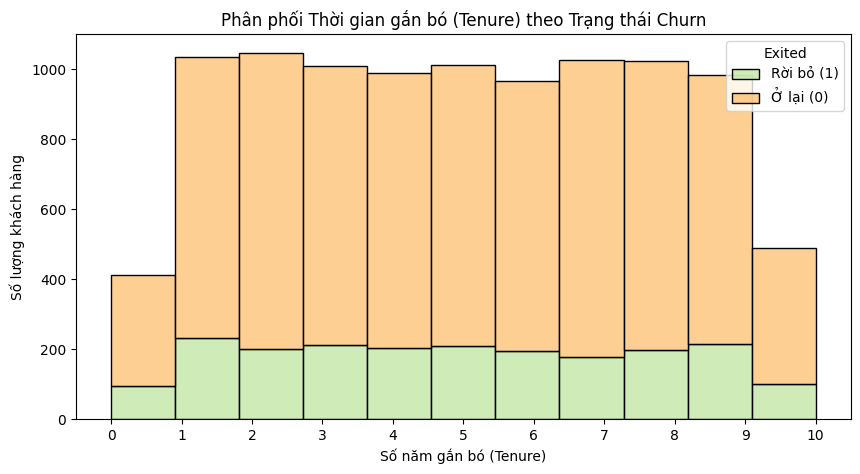

In [ ]:
# Xem các giá trị Tenure có trong dữ liệu (từ 0 đến 10 năm)
print("Các giá trị Tenure (số năm gắn bó):", sorted(df['Tenure'].unique()))

# Xem phân phối Tenure theo Exited
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Tenure', hue='Exited', kde=False, palette='Spectral', multiple='stack', bins=11) # stack để dễ so sánh tổng
plt.title('Phân phối Thời gian gắn bó (Tenure) theo Trạng thái Churn')
plt.xlabel('Số năm gắn bó (Tenure)')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Exited', labels=['Rời bỏ (1)', 'Ở lại (0)'])
plt.xticks(range(0, 11)) # Đảm bảo hiển thị đủ các năm
plt.show()

Các giá trị Tenure (số năm gắn bó): [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

Tỷ lệ Churn (%) theo Số năm gắn bó (Tenure):
Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


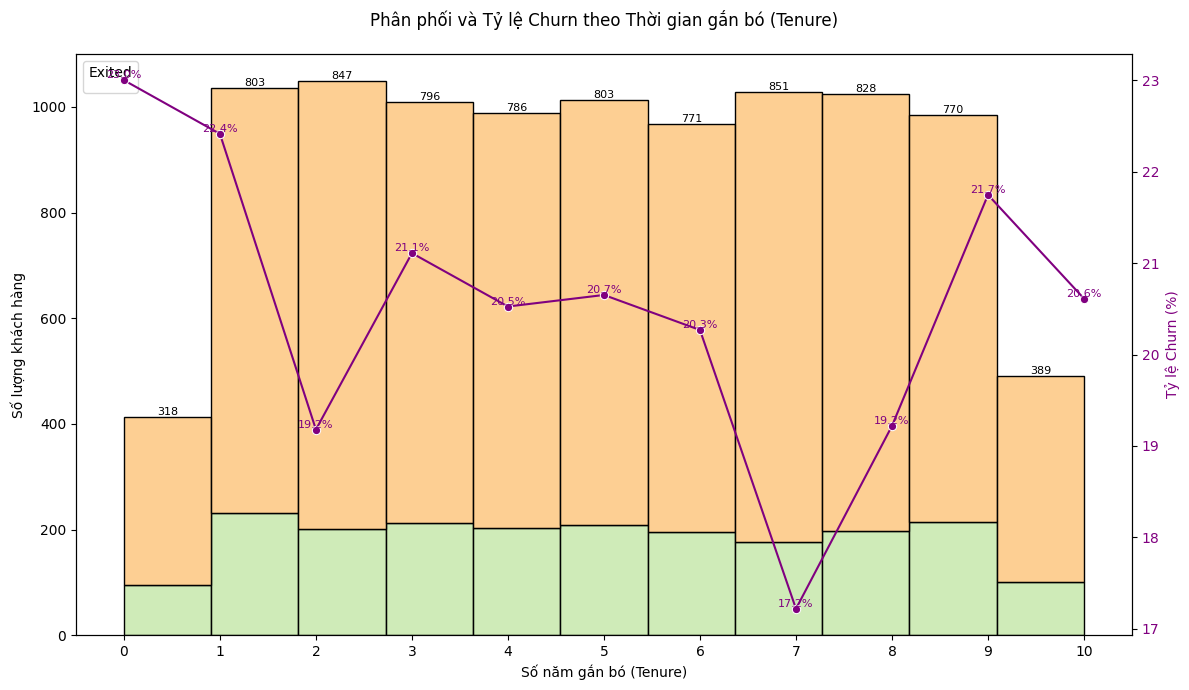

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Đảm bảo bạn đã import pandas và có DataFrame 'df'
# import numpy as np # Bỏ comment nếu cần giả lập dữ liệu

# --- Giả sử bạn đã có DataFrame 'df' chứa cột 'Tenure' và 'Exited' ---
# (Giữ nguyên phần giả lập dữ liệu từ các câu trả lời trước nếu cần)
# np.random.seed(42)
# data = {
#     'Tenure': np.random.randint(0, 11, size=7000),
#     'Exited': np.random.randint(0, 2, size=7000)
# }
# mask_low_tenure = (data['Tenure'] == 0) | (data['Tenure'] == 1)
# mask_high_tenure = (data['Tenure'] == 9) | (data['Tenure'] == 10)
# data['Exited'][mask_low_tenure] = np.random.choice([0, 1], size=mask_low_tenure.sum(), p=[0.75, 0.25])
# data['Exited'][mask_high_tenure] = np.random.choice([0, 1], size=mask_high_tenure.sum(), p=[0.78, 0.22])
# data['Exited'][~(mask_low_tenure | mask_high_tenure)] = np.random.choice([0, 1], size=(~(mask_low_tenure | mask_high_tenure)).sum(), p=[0.82, 0.18])
# df = pd.DataFrame(data)
# --- Kết thúc phần giả lập dữ liệu ---


# 1. Xem và Tính toán dữ liệu cần thiết
print("Các giá trị Tenure (số năm gắn bó):", sorted(df['Tenure'].unique()))
churn_rate_tenure = df.groupby('Tenure')['Exited'].mean().sort_index() * 100
print("\nTỷ lệ Churn (%) theo Số năm gắn bó (Tenure):")
print(churn_rate_tenure)


# 2. Tạo Figure và Axes chính (cho histogram)
fig, ax1 = plt.subplots(figsize=(12, 7)) # Tăng nhẹ chiều cao để có chỗ cho text

# --- Vẽ Biểu đồ Histogram trên trục Y chính (ax1) ---
hist_palette = sns.color_palette('Spectral', 2)
sns.histplot(data=df, x='Tenure', hue='Exited', kde=False,
             palette=hist_palette, multiple='stack', bins=11, ax=ax1)

ax1.set_xlabel('Số năm gắn bó (Tenure)')
ax1.set_ylabel('Số lượng khách hàng', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(0, 11))

# --- Thêm giá trị số lượng lên các cột Histogram (phần Churn) ---
# sns.histplot trả về axes, các bars nằm trong ax1.containers
# container[0] thường là hue=0 ('Ở lại'), container[1] là hue=1 ('Rời bỏ')
# Chúng ta muốn hiển thị số lượng 'Rời bỏ' lên trên đỉnh của phần màu tương ứng
if len(ax1.containers) >= 2: # Kiểm tra xem có đủ 2 containers không (cho 2 giá trị hue)
    container_stay = ax1.containers[0]  # Các cột 'Ở lại (0)'
    container_churn = ax1.containers[1] # Các cột 'Rời bỏ (1)'

    # Đảm bảo hai container có cùng số lượng bar (bins)
    if len(container_stay) == len(container_churn):
        # Lặp qua từng cặp bar tương ứng trong mỗi bin
        for patch_stay, patch_churn in zip(container_stay, container_churn):
            height_stay = patch_stay.get_height()    # Chiều cao của phần 'Ở lại'
            height_churn = patch_churn.get_height()   # Chiều cao của phần 'Rời bỏ'
            total_height = height_stay + height_churn # Tổng chiều cao của cột stack

            # Chỉ hiển thị giá trị nếu phần churn > 0 để tránh rối
            if height_churn > 0:
                # Tọa độ X: tâm của cột
                x_pos = patch_churn.get_x() + patch_churn.get_width() / 2.
                # Tọa độ Y: trên đỉnh của toàn bộ cột stack
                y_pos = total_height
                # Giá trị cần hiển thị: số lượng churn (chiều cao phần churn)
                label = f"{int(height_churn)}"

                # Thêm text vào ax1
                ax1.text(x_pos, y_pos, label,
                         ha='center', va='bottom', # Căn chỉnh: giữa ngang, đáy chữ ở vị trí y_pos
                         fontsize=8,        # Cỡ chữ (điều chỉnh nếu cần)
                         color='black')     # Màu chữ
    else:
        print("Cảnh báo: Số lượng bins trong containers không khớp, không thể thêm nhãn histogram.")
else:
    print("Cảnh báo: Không tìm thấy đủ containers cho histogram (có thể do dữ liệu), không thể thêm nhãn.")


# Xử lý legend cho histogram, đặt ở vị trí phù hợp (ví dụ: góc trên bên trái)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Ở lại (0)', 'Rời bỏ (1)'], title='Exited', loc='upper left')

# 3. Tạo Axes thứ cấp chia sẻ trục X (cho đường tỷ lệ churn)
ax2 = ax1.twinx()

# --- Vẽ Biểu đồ Đường Tỷ lệ Churn trên trục Y thứ cấp (ax2) ---
line_color = 'purple'
sns.lineplot(x=churn_rate_tenure.index, y=churn_rate_tenure.values,
             marker='o', color=line_color, ax=ax2) # Bỏ label ở đây nếu không muốn legend kép

ax2.set_ylabel('Tỷ lệ Churn (%)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)
ax2.grid(False)

# --- Thêm giá trị tỷ lệ lên các điểm trên Line Plot ---
for tenure, rate in churn_rate_tenure.items():
     if pd.notna(rate): # Chỉ thêm text nếu giá trị không phải NaN
         ax2.text(tenure, rate, f'{rate:.1f}%', # Format giá trị tỷ lệ (1 chữ số thập phân)
                  ha='center',        # Căn giữa ngang
                  va='bottom',       # Đặt đáy chữ ngay trên điểm marker
                  fontsize=8,         # Cỡ chữ
                  color=line_color)   # Màu chữ giống màu đường line

# --- Tinh chỉnh cuối cùng và hiển thị ---
plt.title('Phân phối và Tỷ lệ Churn theo Thời gian gắn bó (Tenure)', pad=20) # Tăng khoảng cách tiêu đề
fig.tight_layout()
plt.show()

Các giá trị Tenure (số năm gắn bó): [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

Tỷ lệ Churn (%) theo Số năm gắn bó (Tenure):
Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


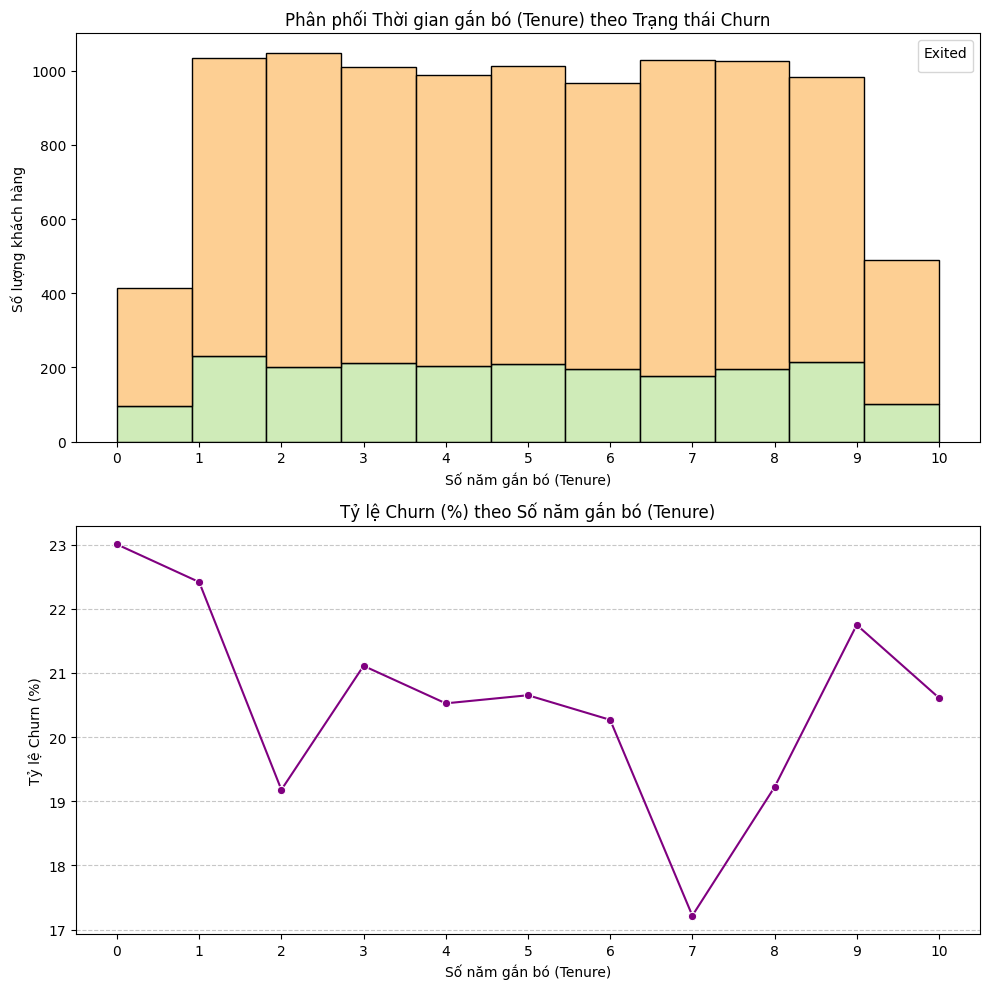

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Đảm bảo bạn đã import pandas
# import numpy as np # Bỏ comment nếu cần giả lập dữ liệu

# --- Giả lập dữ liệu nếu bạn chưa có DataFrame 'df' ---
# (Giữ nguyên phần giả lập dữ liệu từ câu trả lời trước nếu cần)
# np.random.seed(42)
# data = {
#     'Tenure': np.random.randint(0, 11, size=7000),
#     'Exited': np.random.randint(0, 2, size=7000)
# }
# mask_low_tenure = (data['Tenure'] == 0) | (data['Tenure'] == 1)
# mask_high_tenure = (data['Tenure'] == 9) | (data['Tenure'] == 10)
# data['Exited'][mask_low_tenure] = np.random.choice([0, 1], size=mask_low_tenure.sum(), p=[0.75, 0.25])
# data['Exited'][mask_high_tenure] = np.random.choice([0, 1], size=mask_high_tenure.sum(), p=[0.78, 0.22])
# data['Exited'][~(mask_low_tenure | mask_high_tenure)] = np.random.choice([0, 1], size=(~(mask_low_tenure | mask_high_tenure)).sum(), p=[0.82, 0.18])
# df = pd.DataFrame(data)
# --- Kết thúc giả lập dữ liệu ---

# 1. Xem và Tính toán dữ liệu cần thiết
print("Các giá trị Tenure (số năm gắn bó):", sorted(df['Tenure'].unique()))
churn_rate_tenure = df.groupby('Tenure')['Exited'].mean().sort_index() * 100
print("\nTỷ lệ Churn (%) theo Số năm gắn bó (Tenure):")
print(churn_rate_tenure)

# 2. Tạo Figure và một lưới Axes (2 hàng, 1 cột)
# fig là toàn bộ cửa sổ hình ảnh
# axes là một mảng chứa các đối tượng Axes (khu vực vẽ) riêng lẻ
# axes[0] là khu vực vẽ trên cùng, axes[1] là khu vực vẽ dưới cùng
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10)) # Tăng chiều cao figsize

# --- Vẽ Biểu đồ 1: Phân phối Tenure theo Exited (trên axes[0]) ---
sns.histplot(data=df, x='Tenure', hue='Exited', kde=False, palette='Spectral',
             multiple='stack', bins=11, ax=axes[0]) # Chỉ định vẽ trên axes[0]

axes[0].set_title('Phân phối Thời gian gắn bó (Tenure) theo Trạng thái Churn')
axes[0].set_xlabel('Số năm gắn bó (Tenure)')
axes[0].set_ylabel('Số lượng khách hàng')
# Lấy handles và labels từ legend của seaborn để đặt lại cho matplotlib axes
handles, labels = axes[0].get_legend_handles_labels()
# Đặt lại legend với nhãn mô tả đúng thứ tự (kiểm tra lại nếu cần)
# Thông thường, giá trị hue thấp hơn (0) được vẽ trước (dưới cùng trong stack)
axes[0].legend(handles, ['Ở lại (0)', 'Rời bỏ (1)'], title='Exited')
axes[0].set_xticks(range(0, 11)) # Đặt ticks cho trục x của biểu đồ trên

# --- Vẽ Biểu đồ 2: Tỷ lệ Churn (%) theo Tenure (trên axes[1]) ---
sns.lineplot(x=churn_rate_tenure.index, y=churn_rate_tenure.values,
             marker='o', color='purple', ax=axes[1]) # Chỉ định vẽ trên axes[1]

axes[1].set_title('Tỷ lệ Churn (%) theo Số năm gắn bó (Tenure)')
axes[1].set_xlabel('Số năm gắn bó (Tenure)')
axes[1].set_ylabel('Tỷ lệ Churn (%)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7) # Thêm lưới ngang cho biểu đồ dưới
axes[1].set_xticks(range(0, 11)) # Đặt ticks cho trục x của biểu đồ dưới

# --- Tinh chỉnh và Hiển thị ---
plt.tight_layout() # Tự động điều chỉnh khoảng cách giữa các subplot để tránh chồng chéo
plt.show()

###### Phân tích Thành viên tích cực (IsActiveMember)

In [ ]:
# So sánh mức độ giảm churn
churn_inactive = churn_rate_active.loc[0]
churn_active = churn_rate_active.loc[1]
reduction_factor = churn_inactive / churn_active if churn_active > 0 else float('inf')
print(f"\n*   Nhận xét về Tác động của IsActiveMember:")
print(f"    - Khách hàng **Không tích cực (IsActiveMember=0)** có tỷ lệ churn là {churn_inactive:.2f}%.")
print(f"    - Khách hàng **Tích cực (IsActiveMember=1)** có tỷ lệ churn là {churn_active:.2f}%.")
print(f"    - Tỷ lệ churn của nhóm không tích cực cao hơn khoảng **{reduction_factor:.2f} lần** so với nhóm tích cực.")
print("    - => Việc là thành viên tích cực **làm giảm đáng kể nguy cơ churn**.")


print("\n--- 2.2. Khám phá Đặc điểm của Thành viên Không Tích cực ---")
print("*   Lưu ý: Phân tích này chỉ khám phá mối tương quan, không chứng minh nguyên nhân.")

# So sánh giá trị trung bình của các biến khác giữa nhóm Active và Inactive
columns_to_compare = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                      'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Complain']
member_comparison = df.groupby('IsActiveMember')[columns_to_compare].mean()
print("\nSo sánh giá trị trung bình các biến giữa nhóm Tích cực (1) và Không tích cực (0):")
print(member_comparison.T) # .T để dễ so sánh hơn

NameError: name 'churn_rate_active' is not defined

In [ ]:
# Có thể trực quan hóa một vài biến quan trọng để xem sự khác biệt phân phối
vars_to_visualize = ['Age', 'Balance', 'Tenure']
print(f"\nTrực quan hóa phân phối của {vars_to_visualize} theo Trạng thái Tích cực:")

for var in vars_to_visualize:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=var, hue='IsActiveMember', kde=True, palette='icefire', bins=30)
    plt.title(f'Phân phối {var} theo Trạng thái Thành viên Tích cực')
    plt.xlabel(var)
    plt.ylabel('Số lượng khách hàng')
    plt.legend(title='IsActiveMember', labels=['Tích cực (1)', 'Không tích cực (0)'])
    plt.show()


Trực quan hóa phân phối của ['Age', 'Balance', 'Tenure'] theo Trạng thái Tích cực:


ValueError: Could not interpret value `Age` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x400 with 0 Axes>

#### Phân tích trải nghiệm dịch vụ và khiếu nại

###### Phân tích Ảnh hưởng của Việc Khiếu nại

In [ ]:
# Kiểm tra xem cột 'Complain' có tồn tại và có giá trị 0 và 1 không
if 'Complain' not in df.columns:
    print("Lỗi: Cột 'Complain' không tồn tại trong DataFrame.")
else:
    print("Các giá trị trong cột 'Complain':", sorted(df['Complain'].unique()))
    if not all(x in df['Complain'].unique() for x in [0, 1]):
        print("Cảnh báo: Cột 'Complain' không chứa đủ giá trị 0 và 1 để phân tích.")
    else:
        # Tính tỷ lệ churn theo việc có khiếu nại hay không
        churn_rate_complain = df.groupby('Complain')['Exited'].mean().sort_index() * 100
        print("\nTỷ lệ Churn (%) theo Việc Có Khiếu nại (1) hay Không (0):")
        print(churn_rate_complain)

        # Trực quan hóa
        plt.figure(figsize=(6, 4))
        ax_complain = sns.barplot(x=churn_rate_complain.index, y=churn_rate_complain.values, palette='Set2')
        plt.title('Tỷ lệ Churn (%) khi có khiếu nại')
        plt.xlabel('Trạng thái Khiếu nại (0: Không, 1: Có)')
        plt.ylabel('Tỷ lệ Churn (%)')
        plt.xticks([0, 1], ['Không Khiếu nại', 'Có Khiếu nại'])
        # Thêm nhãn phần trăm
        for p in ax_complain.patches:
            ax_complain.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 9), textcoords='offset points')
        plt.show()

###### Phân tích Satisfaction Score (Chỉ cho khách hàng đã khiếu nại)

In [ ]:
# Kiểm tra xem cột 'Satisfaction Score' có tồn tại không
if 'Satisfaction Score' not in df.columns:
    print("Lỗi: Cột 'Satisfaction Score' không tồn tại trong DataFrame.")
elif 'Complain' not in df.columns or 1 not in df['Complain'].unique():
     print("Không thể phân tích Satisfaction Score vì không có dữ liệu khách hàng khiếu nại (Complain=1).")
else:
    # Lọc ra những khách hàng đã khiếu nại
    df_complained = df[df['Complain'] == 1].copy() # Dùng .copy() để tránh warning

    if df_complained.empty:
        print("Không có bản ghi nào của khách hàng đã khiếu nại để phân tích điểm hài lòng.")
    else:
        print(f"Số lượng khách hàng đã khiếu nại: {len(df_complained)}")
        print("Các giá trị Satisfaction Score:", sorted(df_complained['Satisfaction Score'].unique()))

        # Tính tỷ lệ churn cho từng mức điểm hài lòng TRONG NHÓM ĐÃ KHIẾU NẠI
        churn_rate_satisfaction = df_complained.groupby('Satisfaction Score')['Exited'].mean().sort_index() * 100
        print("\nTỷ lệ Churn (%) theo Điểm Hài lòng (trong nhóm đã khiếu nại):")
        print(churn_rate_satisfaction)

        # Trực quan hóa
        plt.figure(figsize=(8, 5))
        # Dùng barplot để thấy rõ từng mức điểm
        ax_sat = sns.barplot(x=churn_rate_satisfaction.index, y=churn_rate_satisfaction.values, palette='coolwarm')
        plt.title('Tỷ lệ Churn (%) theo Điểm Hài lòng (Chỉ khách hàng đã khiếu nại)')
        plt.xlabel('Điểm Hài lòng (1: Thấp nhất, 5: Cao nhất)')
        plt.ylabel('Tỷ lệ Churn (%)')
        plt.ylim(0, 105) # Đặt giới hạn trục y tới hơn 100% một chút để dễ nhìn
        # Thêm nhãn phần trăm
        for p in ax_sat.patches:
            ax_sat.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 9), textcoords='offset points')
        plt.show()

***Nhận xét: Khiếu nại là một yếu tố dự báo churn cực mạnh. Mức độ hài lòng với việc giải quyết khiếu nại (như được đo bằng Satisfaction Score) dường như có ít tác động đến quyết định churn cuối cùng của những người đã khiếu nại trong tập dữ liệu này.**bold text**

#### Xây dựng Hồ sơ Khách hàng có Nguy cơ Churn Cao

In [ ]:
# Tạo lại các nhóm tuổi nếu chưa có
max_age = df['Age'].max()
bins = [18, 30, 40, 50, 60, max_age]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
if 'AgeGroup' not in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Hàm trợ giúp để tính toán và in thông tin phân khúc
def analyze_segment(data, description):
    """Tính toán và in tỷ lệ churn và kích thước cho một phân khúc dữ liệu."""
    if data.empty:
        print(f"\nPhân khúc: {description}")
        print("  -> Không có khách hàng trong phân khúc này.")
        return 0, 0
    churn_rate = data['Exited'].mean() * 100
    segment_size = len(data)
    total_churners_in_segment = data['Exited'].sum()
    total_churners_overall = df['Exited'].sum()
    percent_of_total_churners = (total_churners_in_segment / total_churners_overall) * 100 if total_churners_overall > 0 else 0

    print(f"\nPhân khúc: {description}")
    print(f"  - Kích thước phân khúc: {segment_size} khách hàng")
    print(f"  - Tỷ lệ Churn trong phân khúc: {churn_rate:.2f}%")
    print(f"  - Số lượng churners trong phân khúc: {total_churners_in_segment}")
    print(f"  - Chiếm tỷ lệ trong tổng số churners: {percent_of_total_churners:.2f}%")
    return churn_rate, segment_size

In [ ]:
# --- Các Hồ sơ Rủi ro Cao dựa trên Phân tích Trước ---

# Hồ sơ 1: Khách hàng đã Khiếu nại
print("\n--- Hồ sơ dựa trên Yếu tố Đơn lẻ Mạnh ---")
df_complain = df[df['Complain'] == 1]
analyze_segment(df_complain, "Khách hàng đã Khiếu nại (Complain == 1)")

# Hồ sơ 2: Khách hàng có >= 3 sản phẩm
df_many_products = df[df['NumOfProducts'] >= 3]
analyze_segment(df_many_products, "Khách hàng có 3 hoặc 4 Sản phẩm (NumOfProducts >= 3)")

# Hồ sơ 3: Khách hàng Không Tích cực
df_inactive = df[df['IsActiveMember'] == 0]
analyze_segment(df_inactive, "Khách hàng Không Tích cực (IsActiveMember == 0)")

# Hồ sơ 4: Khách hàng ở Đức
df_germany = df[df['Geography'] == 'Germany']
analyze_segment(df_germany, "Khách hàng ở Đức (Geography == 'Germany')")

# Hồ sơ 5: Khách hàng Nữ
df_female = df[df['Gender'] == 'Female']
analyze_segment(df_female, "Khách hàng Nữ (Gender == 'Female')")

# Hồ sơ 6: Nhóm Tuổi Trung niên
df_middle_age = df[df['AgeGroup'].isin(['40-49', '50-59'])]
analyze_segment(df_middle_age, "Khách hàng Tuổi Trung niên (40-59 tuổi)")

# --- Các Hồ sơ Rủi ro Cao dựa trên Kết hợp Yếu tố ---
print("\n--- Hồ sơ dựa trên Kết hợp Yếu tố ---")

# Hồ sơ 7: Khách hàng ở Đức VÀ Không Tích cực
df_ger_inactive = df[(df['Geography'] == 'Germany') & (df['IsActiveMember'] == 0)]
analyze_segment(df_ger_inactive, "Khách hàng ở Đức VÀ Không Tích cực")

# Hồ sơ 8: Khách hàng Trung niên (40-59) VÀ Không Tích cực
df_midage_inactive = df[(df['AgeGroup'].isin(['40-49', '50-59'])) & (df['IsActiveMember'] == 0)]
analyze_segment(df_midage_inactive, "Khách hàng Trung niên (40-59) VÀ Không Tích cực")

# Hồ sơ 9: Khách hàng Nữ ở Đức
df_ger_female = df[(df['Geography'] == 'Germany') & (df['Gender'] == 'Female')]
analyze_segment(df_ger_female, "Khách hàng Nữ ở Đức")

# Hồ sơ 10: Khách hàng có Số dư cao (ví dụ > trung vị) VÀ Không Tích cực
median_balance = df[df['Balance'] > 0]['Balance'].median() # Tính trung vị cho người có số dư
df_highbal_inactive = df[(df['Balance'] > median_balance) & (df['IsActiveMember'] == 0)]
analyze_segment(df_highbal_inactive, f"Khách hàng có Số dư > {median_balance:.0f} VÀ Không Tích cực")

# Hồ sơ 11: Khách hàng có 1 Sản phẩm VÀ Không Tích cực
df_1prod_inactive = df[(df['NumOfProducts'] == 1) & (df['IsActiveMember'] == 0)]
analyze_segment(df_1prod_inactive, "Khách hàng có 1 Sản phẩm VÀ Không Tích cực")

print("\n*   Kết luận về Hồ sơ Rủi ro Cao:")
print("    - Các nhóm khách hàng có nguy cơ rời bỏ cao nhất thường là sự kết hợp của các yếu tố:")
print("      + Đã từng khiếu nại (rủi ro cực cao).")
print("      + Có 3 hoặc 4 sản phẩm (rủi ro cực cao).")
print("      + Không hoạt động tích cực (IsActiveMember=0).")
print("      + Ở Đức.")
print("      + Thuộc nhóm tuổi trung niên (đặc biệt 40-59).")
print("      + Giới tính nữ (có tỷ lệ cao hơn nam).")
print("    - Việc kết hợp các yếu tố (ví dụ: Không tích cực + Trung niên, hoặc ở Đức + Không tích cực) tạo ra các phân khúc có tỷ lệ churn rất cao và chiếm một phần đáng kể trong tổng số người rời bỏ.")


## OVERALL ASSESSMENT

- Churn là vấn đề đáng kể: Tỷ lệ khách hàng rời bỏ (khoảng 20%) là một con số đáng kể, cho thấy ngân hàng đang đối mặt với một thách thức thực sự trong việc giữ chân khách hàng, ảnh hưởng đến sự ổn định kinh doanh.
- Churn là một hiện tượng phức tạp: Không có một nguyên nhân duy nhất nào giải thích hoàn toàn việc khách hàng rời bỏ. Thay vào đó, nó là kết quả của sự tương tác giữa nhiều yếu tố đa dạng, bao gồm đặc điểm cá nhân, tình hình tài chính, cách họ sử dụng sản phẩm, mức độ gắn kết và trải nghiệm của họ với dịch vụ ngân hàng.
- Có những phát hiện bất ngờ: Dựa trên cho thấy những điểm không như dự đoán thông thường, ví dụ như việc khách hàng có số dư tài khoản cao hơn không đồng nghĩa với việc họ trung thành hơn, và điểm hài lòng về giải quyết khiếu nại dường như không ảnh hưởng nhiều đến quyết định cuối cùng của những người đã khiếu nại.


## CONCLUSION

1. Xác định được các yếu tố dự báo churn nhiều nhất: Phân tích đã chỉ ra các yếu tố có tác động rõ rệt nhất đến khả năng khách hàng rời bỏ, bao gồm:
+ Việc đã từng khiếu nại (Complain).
+ Việc sở hữu số lượng sản phẩm bất thường (đặc biệt là >= 3 sản phẩm).
+ Thuộc nhóm tuổi trung niên (40-59).
+ Trạng thái không hoạt động tích cực (IsActiveMember = 0).
+ Vị trí địa lý ở Đức (Geography = Germany).
+ Tình trạng số dư tài khoản (Balance) (việc không có số dư lại ít churn hơn).
2. Xác định được các yếu tố ít ảnh hưởng hơn: Các yếu tố như Thời gian gắn bó (Tenure), Điểm tín dụng (CreditScore), Giới tính (Gender), Lương ước tính (EstimatedSalary), Việc có thẻ tín dụng (HasCrCard), Loại thẻ (Card Type), và Điểm tích lũy (Point Earned) cho thấy mối liên hệ yếu hơn hoặc không rõ ràng với churn trong tập dữ liệu này.
3. Sự cần thiết của Phân khúc và Cá nhân hóa: Sự khác biệt rõ rệt trong các yếu tố ảnh hưởng đến churn giữa các nhóm khách hàng khác nhau nhấn mạnh rằng một chiến lược giữ chân "one-size-fits-all" sẽ không hiệu quả. Ngân hàng cần áp dụng các phương pháp tiếp cận dựa trên phân khúc và cá nhân hóa để giải quyết các nhu cầu và rủi ro cụ thể của từng nhóm.

## SOLUTION

1. Ưu tiên Hàng đầu: Phòng ngừa và Xử lý Khiếu nại Triệt để:
- Phòng ngừa: Đây là chiến lược quan trọng nhất. Đầu tư vào cải thiện chất lượng sản phẩm, dịch vụ, quy trình minh bạch để giảm thiểu nguyên nhân gây ra khiếu nại. Phân tích nguyên nhân gốc rễ của các khiếu nại hiện có.
- Xử lý TRIỆT ĐỂ: Dữ liệu phân tích trước đó đã chỉ ra rằng tỷ lệ khách hàng rời bỏ (churn) sau khi họ đã khiếu nại là cực kỳ cao (gần 100%), bất kể điểm hài lòng (Satisfaction Score) của họ về việc giải quyết khiếu nại đó như thế nào. Do đó nếu có khiếu nại xảy ra, cần có quy trình xử lý nhanh chóng, hiệu quả và trao quyền cho nhân viên giải quyết vấn đề ngay lập tức. Mục tiêu là tạo ra một trải nghiệm tích cực có thể thay đổi quyết định của khách hàng.
2. Quản lý Danh mục Sản phẩm Chủ động:
- Nhóm >= 3 sản phẩm: Chủ động liên hệ với nhóm khách hàng này. Rà soát xem liệu tất cả các sản phẩm có thực sự cần thiết và phù hợp không. Đề xuất tối ưu hóa, hợp nhất hoặc loại bỏ sản phẩm không cần thiết thay vì cố bán thêm.
- Nhóm 1 sản phẩm: Phân tích lý do họ chỉ có 1 sản phẩm và tại sao tỷ lệ churn lại cao hơn nhóm 2 sản phẩm. Có thể họ chưa thấy giá trị gia tăng hoặc sản phẩm không đáp ứng đủ nhu cầu. Cân nhắc chiến lược cross-selling sản phẩm thứ hai phù hợp.
3. Tăng cường Tương tác và Tái kích hoạt Khách hàng:
- Nhóm Không Tích cực (IsActiveMember=0): Triển khai các chiến dịch re-engagement nhắm mục tiêu (email, thông báo ứng dụng). Cung cấp lý do cụ thể để họ quay lại (tính năng mới, ưu đãi cá nhân hóa dựa trên hồ sơ của họ - ví dụ: ưu đãi lãi suất cho nhóm trung niên, không hoạt động, có số dư). Khảo sát lý do không hoạt động.
4. Xây dựng Chiến lược theo Phân khúc Cụ thể:
- Khách hàng ở Đức: Thực hiện nghiên cứu thị trường sâu hơn tại Đức để hiểu rõ bối cảnh cạnh tranh, quy định và nhu cầu khách hàng. Điều chỉnh sản phẩm, giá cả, marketing và dịch vụ cho phù hợp với thị trường này.
- Khách hàng Trung niên (40-59): Thiết kế các gói sản phẩm, dịch vụ tư vấn (đầu tư, hưu trí, vay vốn) và chương trình chăm sóc đặc biệt phù hợp với nhu cầu tài chính ở giai đoạn này.
- Khách hàng Nữ: Xem xét liệu có các sản phẩm hoặc cách tiếp cận truyền thông nào phù hợp hơn với nhóm khách hàng này không, đặc biệt là ở các khu vực có tỷ lệ churn nữ cao.
5. Tận dụng Dữ liệu để Can thiệp Chủ động:
- Xây dựng Mô hình Dự đoán Churn: Phát triển mô hình Machine Learning để xác định những khách hàng có nguy cơ churn cao trước khi họ thể hiện các dấu hiệu rõ ràng. Điều này cho phép can thiệp sớm và hiệu quả hơn.
- Theo dõi Hành vi Khách hàng: Bổ sung các chỉ số về hành vi (tần suất đăng nhập, giao dịch gần nhất, sử dụng tính năng...) để hiểu rõ hơn về "mức độ hoạt động" và dự đoán churn chính xác hơn.
Thu thập Phản hồi Định kỳ: Sử dụng các công cụ như NPS (Net Promoter Score) hoặc khảo sát CSAT (Customer Satisfaction) ngắn gọn, thường xuyên để nắm bắt "sức khỏe" mối quan hệ khách hàng và phát hiện sớm các vấn đề.
6. Thử nghiệm và Đo lường:
- A/B Testing: Thử nghiệm các chiến dịch giữ chân khác nhau (ví dụ: các loại ưu đãi khác nhau cho nhóm không tích cực) trên các nhóm nhỏ để xác định phương pháp hiệu quả nhất trước khi triển khai rộng rãi.
Phân tích ROI: Đánh giá chi phí và lợi ích của từng chiến lược giữ chân để đảm bảo đầu tư hiệu quả.

Tóm lại: Ngân hàng cần một cách tiếp cận đa chiều, tập trung vào việc ngăn chặn các yếu tố rủi ro cao nhất (khiếu nại, số lượng sản phẩm không phù hợp), tái kích hoạt khách hàng kém tương tác, và điều chỉnh chiến lược cho các phân khúc nhân khẩu học và địa lý cụ thể. Việc xây dựng khả năng dự đoán và can thiệp chủ động dựa trên dữ liệu sẽ là chìa khóa để giảm thiểu churn một cách bền vững.